# Final Project- Part A
### Group 18
__________________

<a href="#1.loading_the_data">1 : Loading the data</a>

<a href="#2.Data_Exploration">2: Data Exploration</a>

<a href="#3.Missing_values">3: Missing values</a>

<a href="#4.Feature_engineering">4: Feature engineering</a>

<a href="#5.Data_Normalization">5: Data Normalization</a>

<a href="#6.Training">6: Training</a>

<a href="#7.Explainable_AI-_SHAP">7:Explainable AI-SHAP</a>

<a href="#8.Inference">8: Inference</a>

<a href="#9.Bonus">9: Bonus</a>

#### import some libraries that we need for this code.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from imblearn.over_sampling import ADASYN

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import random
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

import xgboost as xgb
from xgboost import XGBClassifier

pd.set_option('display.max_columns', 150)                 # To show all the columns in the tables

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

from scipy import interp

from sklearn.model_selection import train_test_split
import shap

## 1.loading_the_data
#### Read the train data and test data from a csv files and save copies

In [2]:
data = pd.read_csv("ctr_dataset_train.csv")          # Read the train data
test = pd.read_csv("ctr_dataset_test.csv")           # Read the test data

temp=data.copy()
temp_test=test.copy()

show the first rows of the train set

In [3]:
print ('These are the 5 first rows:')
data.head()

These are the 5 first rows:


,op_id,timestamp,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version,device_height,device_width,resolution,clicked
0,448ed944-b0a3-4f8e-9662-fb1202e2777b,1569445326,New Jersey,Comcast Cable,6rm7ag7,games - simulation,top-right,Samsung,SM-G925V,6.0.1,792,1408,True,False
1,3c501ca8-f771-4926-acce-d532f979b8b5,1566517297,Illinois,Verizon Wireless,74193f6,games - card,right,NaN,NaN,7.0,2560,1440,True,False
2,db342130-0f34-4d43-a72c-3c1891eade24,1566375809,California,T-Mobile USA,6549c21,games - puzzle,top-left,NaN,NaN,7.0,1280,720,True,False
3,f080c21c-7791-44c5-9429-8eb411786fe7,1568568842,California,T-Mobile USA,dng7e8p,unknown,left,Samsung,SM-J700T1,7.1.1,1280,720,True,False
4,3ca5ac37-7beb-4d2e-b0a8-662a4f9eb614,1571357999,Georgia,North Carolina Research and Education Network,hp3monn,games - simulation,top-left,T-Mobile,5049W,7.0,720,1280,True,True


--------------------------------------------------------
## 2.Data_Exploration

In this part, we will explore the data. This is done by displaying statistics, data types, correlations between them and etc.
In addition, visualization was done for the investigation.
This is mostly done by pandas, sns and matplotlib.
<br> <b> Note that the investigation was done in addition in the main function which is responsible for arranging the entire data to be ready for training and predicting in 1 place. <br>
Apart from the investigation (adasyn & missing values) the explanation will be in this section but will actually be done in the main function.

----------------------------------------------------------

### A- First, we will show  the shape, the types and statistics about it.

In [4]:
# Show the numbers of rows and columns-the shape
print ('The shape of the data is:',data.shape, '\n')

# Show the the type for each column
print ('\n The types for each column:')
data.info()

The shape of the data is: (2519056, 14) 


 The types for each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519056 entries, 0 to 2519055
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   op_id           object
 1   timestamp       int64 
 2   state           object
 3   user_isp        object
 4   app_id          object
 5   app_cat         object
 6   banner_pos      object
 7   manufacturer    object
 8   device_model    object
 9   device_version  object
 10  device_height   int64 
 11  device_width    int64 
 12  resolution      bool  
 13  clicked         bool  
dtypes: bool(2), int64(3), object(9)
memory usage: 235.4+ MB


In [5]:
# Show statistics calculating for numeric columns columns. we can see count,mean,std,min,max and some percentages
print ('These are statistics about the numeric columns:')
data.describe() 

These are statistics about the numeric columns:


,timestamp,device_height,device_width
count,2.519056e+06,2.519056e+06,2.519056e+06
mean,1.569178e+09,1.181182e+03,1.152202e+03
std,2.319487e+06,5.193045e+02,4.526964e+02
min,1.564423e+09,1.400000e+01,1.400000e+01
25%,1.567306e+09,7.200000e+02,7.200000e+02
50%,1.569317e+09,1.080000e+03,1.080000e+03
75%,1.570937e+09,1.280000e+03,1.280000e+03
max,1.573475e+09,3.120000e+03,3.120000e+03


In [6]:
# Show statistics calculating for categorial columns columns. we can see count,top,unique and frequently.
print ('These are statistics about the categorial columns:')
data.describe(include=np.object) 

These are statistics about the categorial columns:


,op_id,state,user_isp,app_id,app_cat,banner_pos,manufacturer,device_model,device_version
count,2519056,2519056,2519024,2519056,2519056,2519056,1748114,1748210,2519056
unique,2519056,51,3316,14315,46,9,251,2256,16
top,c69ea1c7-d210-441e-9ebf-0720237be27d,Texas,T-Mobile USA,mc8dtso,unknown,top-left,Samsung,LM-X210(G),7.0
freq,1,327255,589526,43385,596348,304202,690996,88524,867074


### B- Second, we will show  visualization.
Here we show the correlation between each pair of columns by a heat map and by a pair graph for visualization. In addition we will show the histogram for each numeric column, Box plot, plot for categorial columns and pie chart for the count of the labels. Beyond this, we see a density graph for each numeric column.

<b>correlation-</b> Show heat map with the correlations between all the dataframe's columns pairs

In [7]:
def showheatmap(dataframe):
    print('Here we can see the corralation heatmap of the columns:')
    fig, ax =plt.subplots(figsize=(17, 17))
    sns.heatmap(dataframe.corr(), annot=True, cmap="Blues")        # create heat map with the correlations
    b, t = plt.ylim()                                              # discover the values for bottom and top
    b += 0.5                                                       # Add 0.5 to the bottom
    t -= 0.5                                                       # Subtract 0.5 from the top
    plt.ylim(b, t)                                                 # update the ylim(bottom, top) values
    ax.set_title('Heat Map')                                       # Add title
    plt.show()

<b> pair plot- </b> Show the correlations for all the pairs by plots but only for numeric columns (tha diagnoal shows the histogram for each feature).

In [8]:
def showcorrelation(dataframe):
    print ('\n\nThis is the pair plot for numeric cloumns')
    sns.set(style="ticks", color_codes=True)
    sns.pairplot(dataframe, height=2)      # create the pair plot

<b>Histogram- </b>Plot histogram for each numerical feature, so we can see better the manner in which the features are distributed.

In [9]:
def get_histogram(data):                                             
    for category in data.columns[:]:                                # All The columns 
        if category != 'resolution':                                # didn't check this column because it has 0 variance
            if data[category].dtype!=object:                        # For all the coulmuns excpet columns from object type
                print ('Histogram for feature:',category)           # We will know the current feature
                data[category].plot.hist(color = "skyblue")         # Plot and show
                plt.show()

<b>Density plot- </b>Shows a density graph for each numeric column to understand the nature of its distribution.

In [10]:
def get_density(data):                                              
    for category in data.columns[:]:                                   # All The columns 
        if category != 'resolution':                                   # didn't check this column because it has 0 variance
            if data[category].dtype!=object:                           # For all the coulmuns excpet columns from object type
                print ('Density plot for feature:',category)           # We will know the current feature
                data[category].plot.kde(color = "skyblue")             # Plot and show
                plt.show()

<b> box-plot- </b> Show the Box-Plot for each numerical feature

In [11]:
def ShowBoxPlot(dataframe):                               # Show all the Box-Plot for each columns in 1 plot
    fig, ax =plt.subplots(figsize=(8, 5))      
    plt.title('This is the box plot for numeric columns')
    dataframe.boxplot()

<b> Categorial's plot- </b> Shows plots for the categorial columns to explore them also- we will count the number of each value for each column.

In [12]:
# This function get data and for each categorial column it count number of each value and create a plot.
def ShowCategorialPlots(dataframe):
    for column in dataframe:                                     # For each catedgorial column we will show an histogram
        if (dataframe[column].dtype==object):
            print ('This is histogram for categorial feature number:',column)
            fig, ax =plt.subplots(figsize=(20, 15))              # Define the size of the plots
             # The histogram plot for the 30 highest cetagories
            sns.countplot(y=dataframe[column], color="purple", data=dataframe, order=dataframe[column].value_counts().iloc[:30].index)    
            plt.show()                                           # Show the plot


<b> prints all the visualization from above

In [13]:
def main_visualizations(data):
    print ('This is the heat-map for the numerical columns only')
    showheatmap(data)
    print ('\n\nThis is the cateforial plots')
    ShowCategorialPlots(data)
    print ('\n\nThis is the histogram for numeric columns')
    get_histogram(data)
    print ('\n\nThis is the density plot for numeric columns')
    get_density(data)
    ShowBoxPlot(data[['device_height', 'device_width', 'resolution', 'clicked']])
    showcorrelation(data)

This is the heat-map for the numerical columns only
Here we can see the corralation heatmap of the columns:


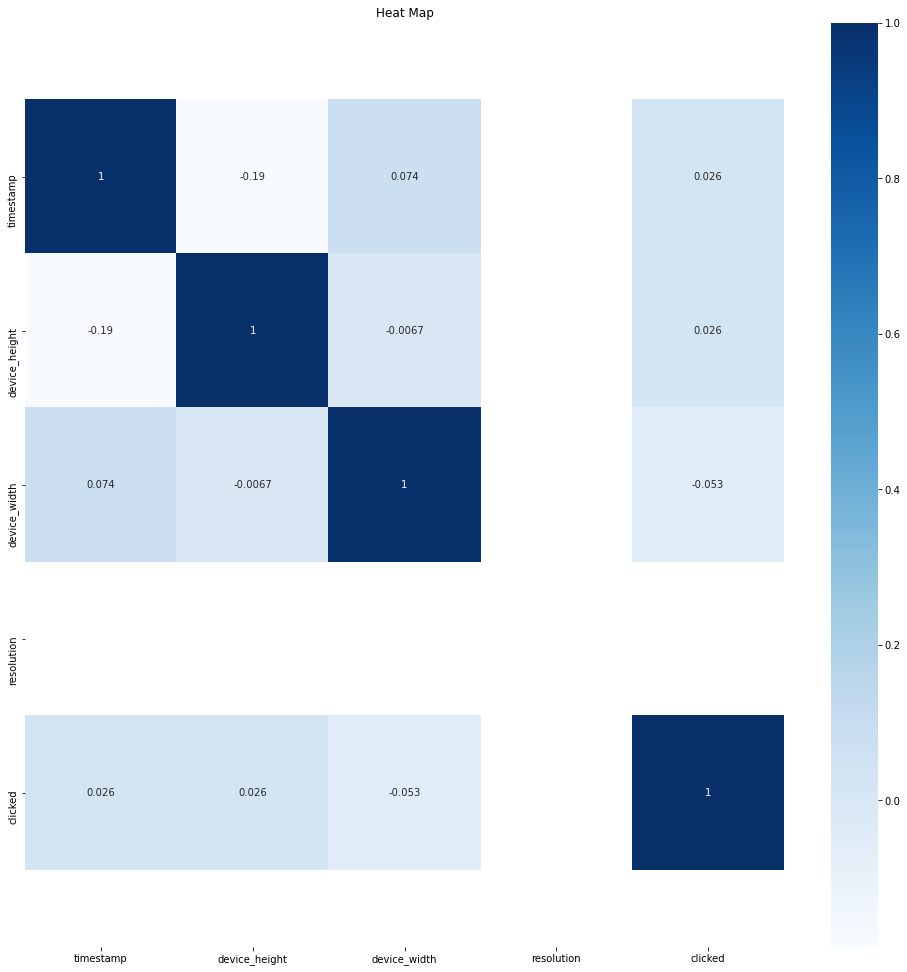



This is the cateforial plots
This is histogram for categorial feature number: op_id


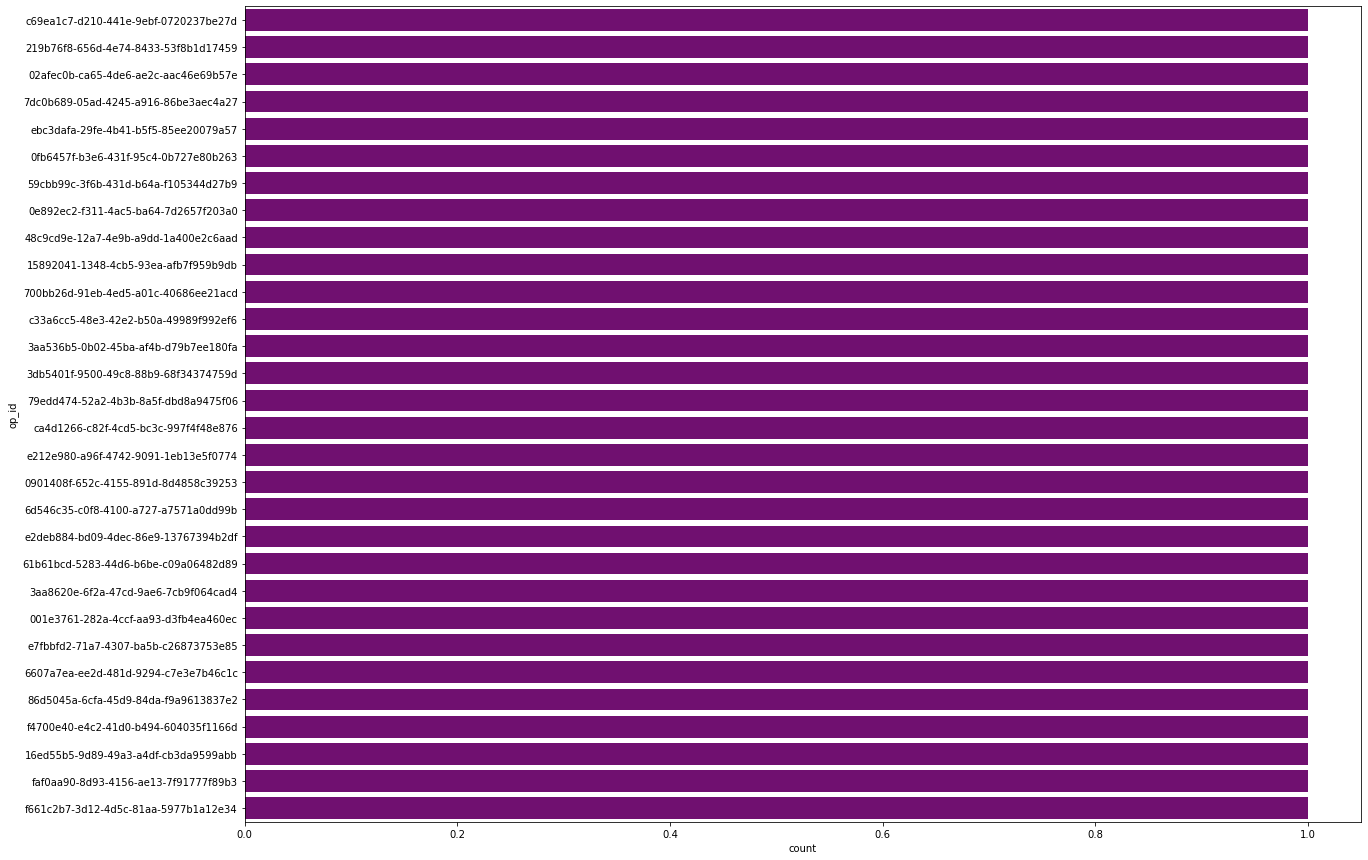

This is histogram for categorial feature number: state


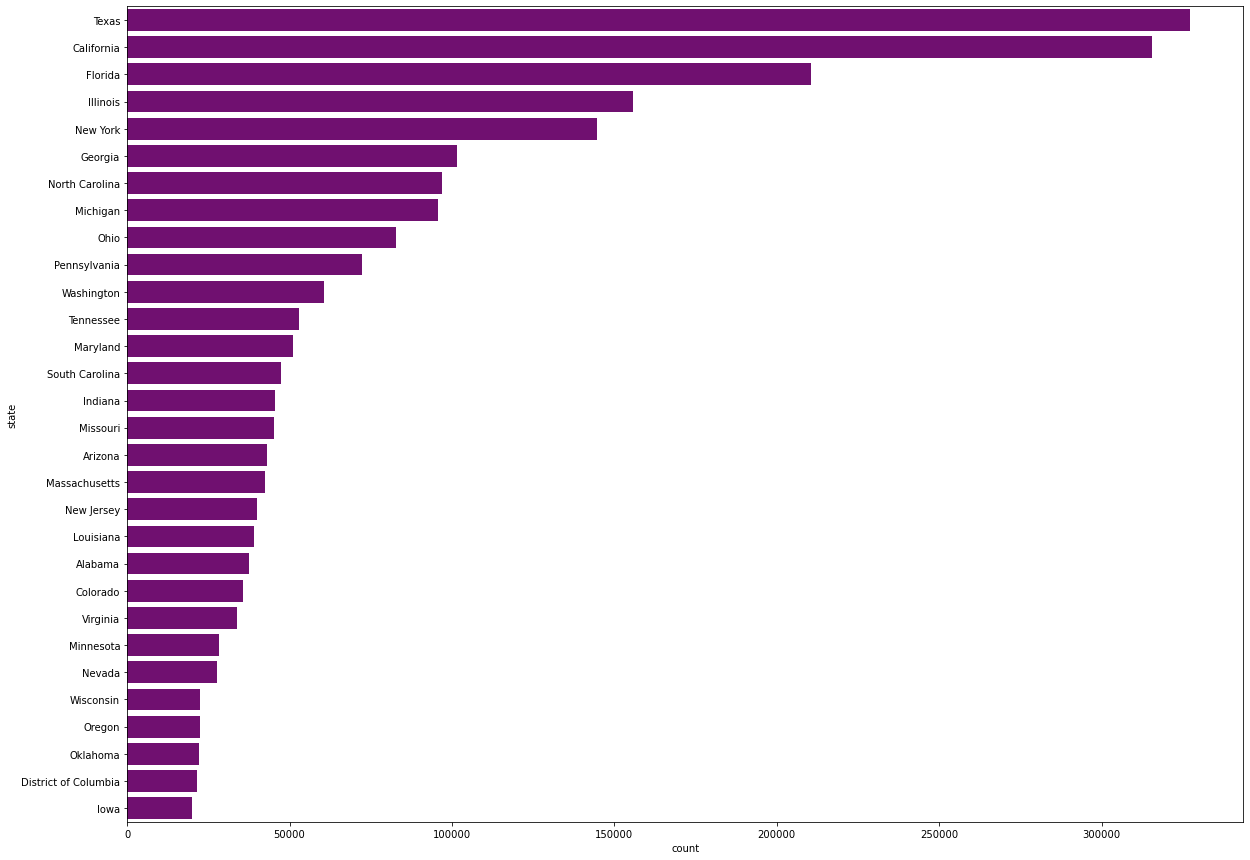

This is histogram for categorial feature number: user_isp


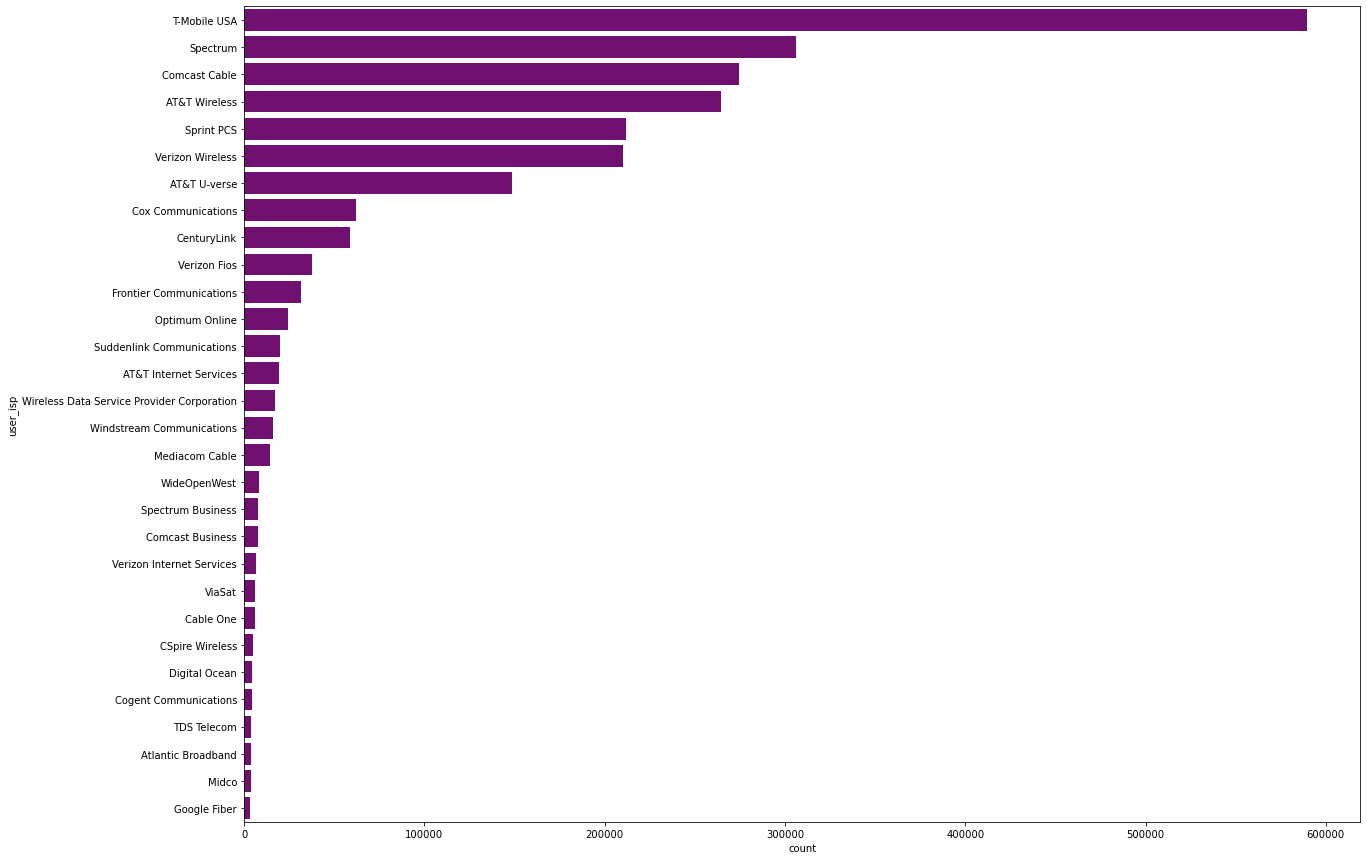

This is histogram for categorial feature number: app_id


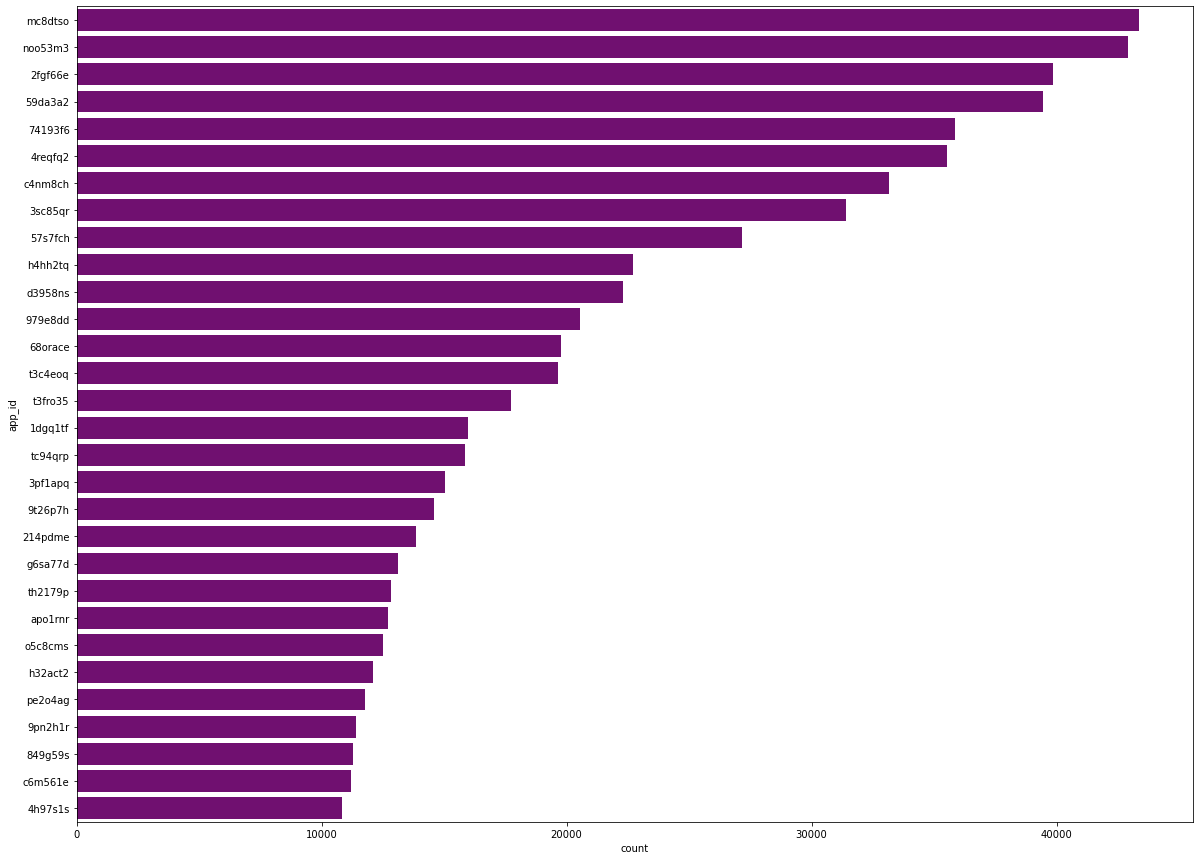

This is histogram for categorial feature number: app_cat


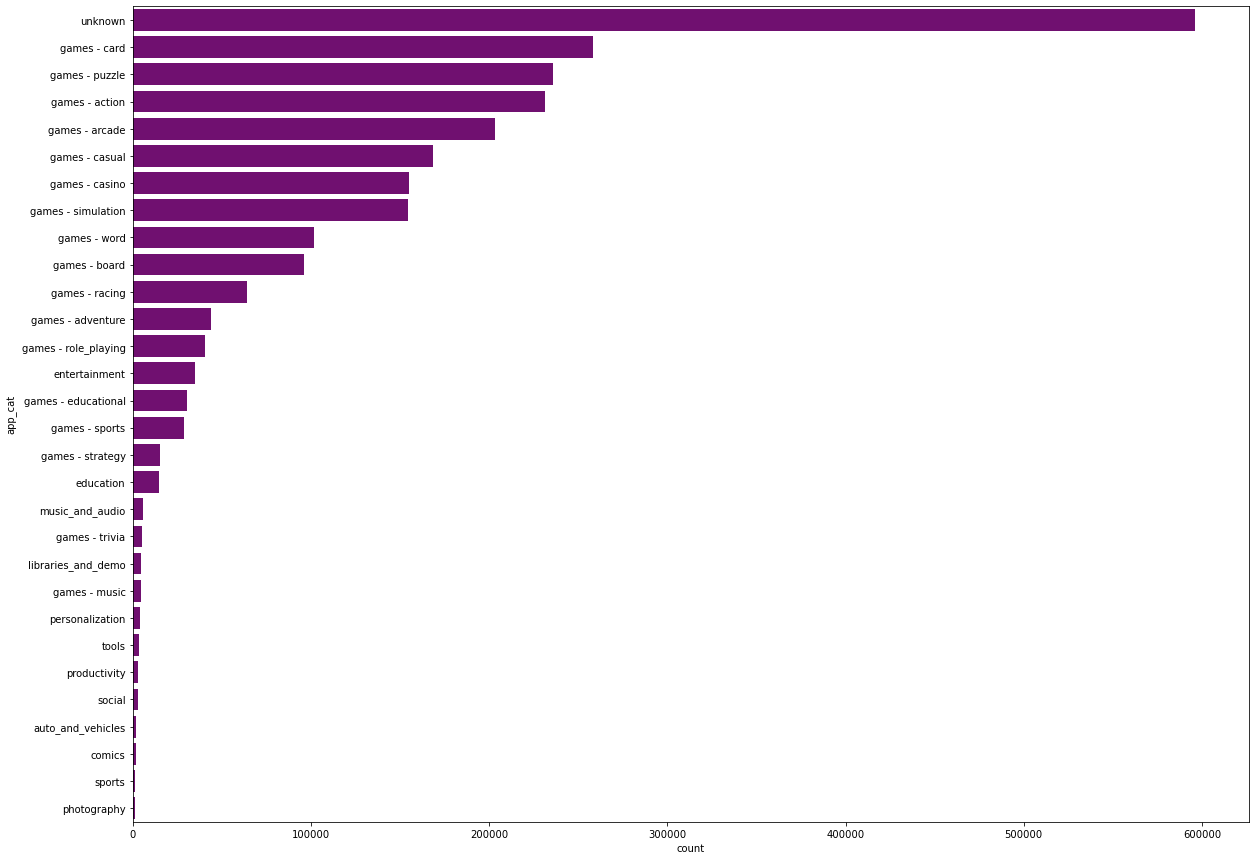

This is histogram for categorial feature number: banner_pos


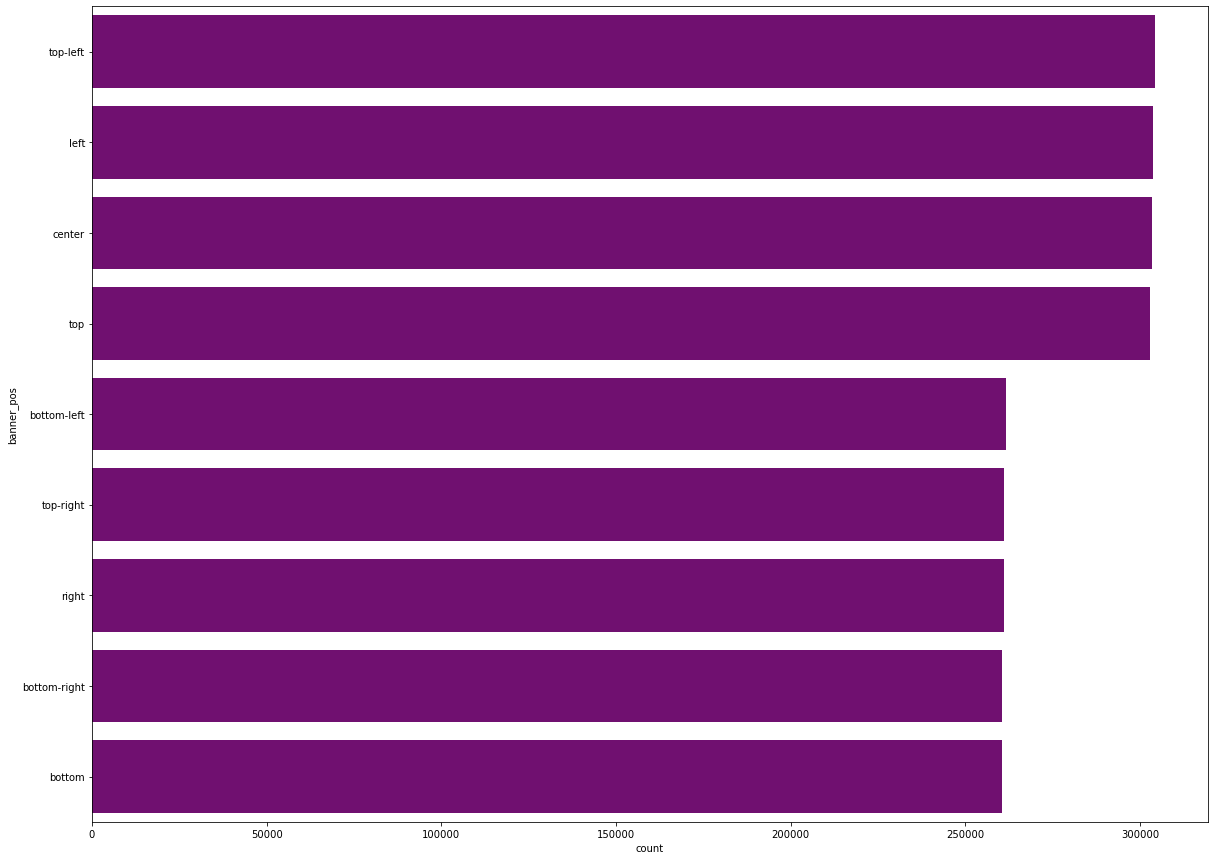

This is histogram for categorial feature number: manufacturer


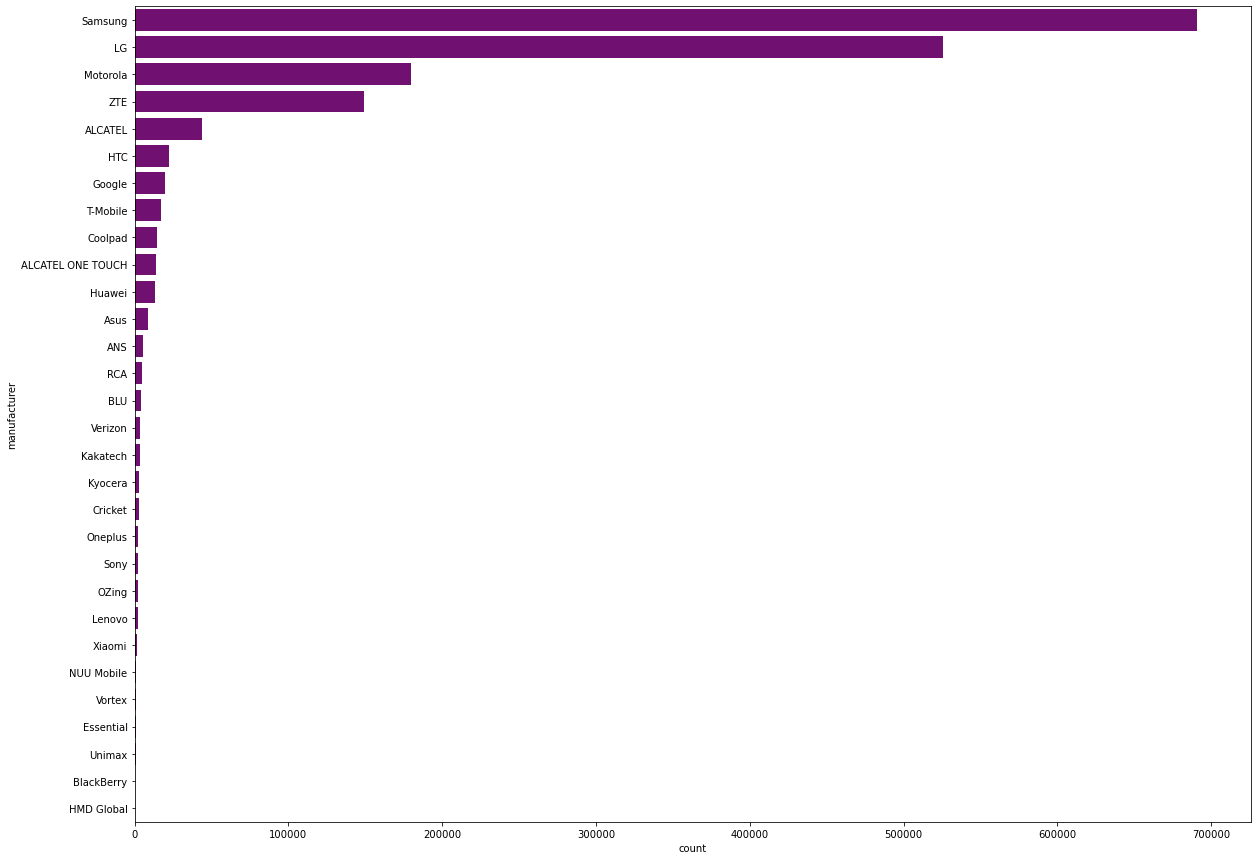

This is histogram for categorial feature number: device_model


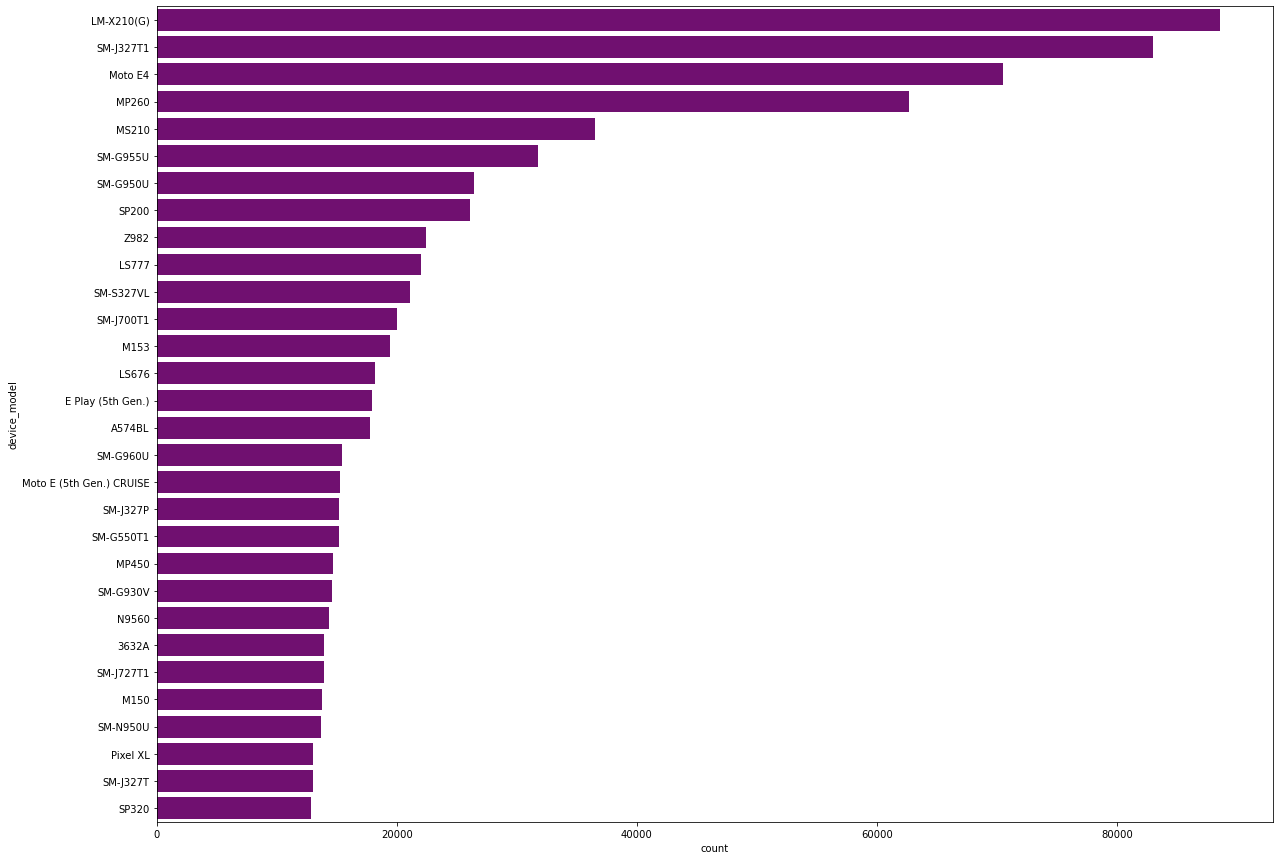

This is histogram for categorial feature number: device_version


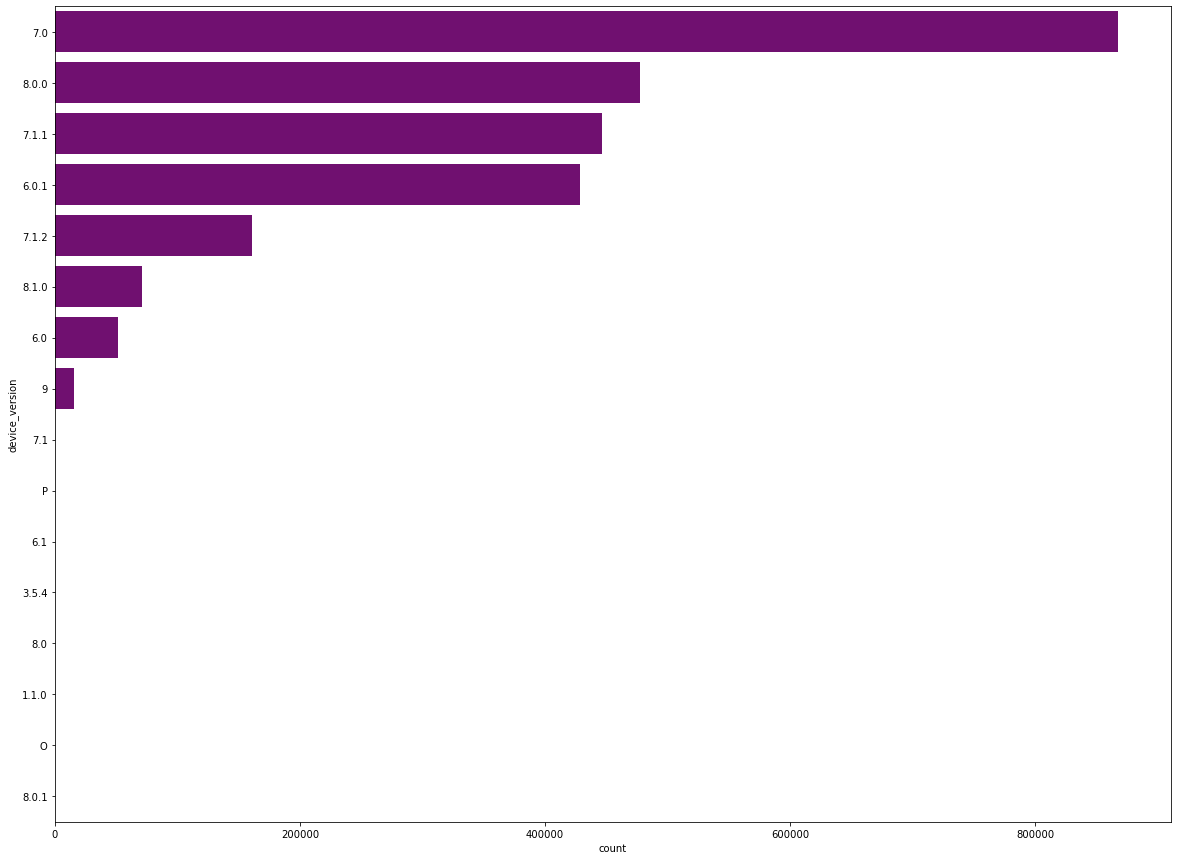



This is the histogram for numeric columns
Histogram for feature: timestamp


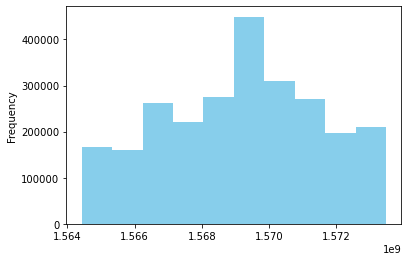

Histogram for feature: device_height


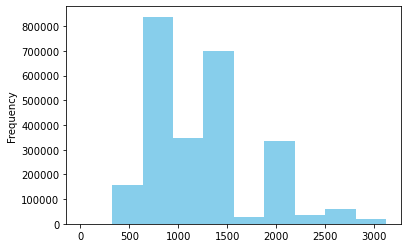

Histogram for feature: device_width


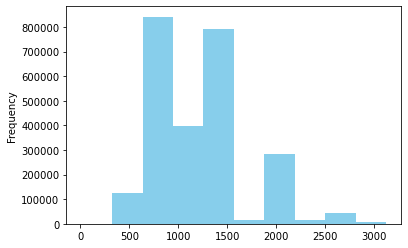

Histogram for feature: clicked


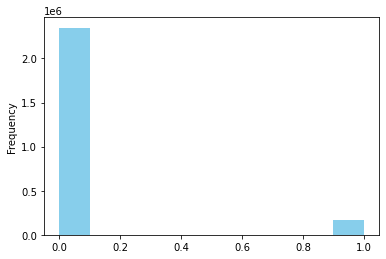



This is the density plot for numeric columns
Density plot for feature: timestamp


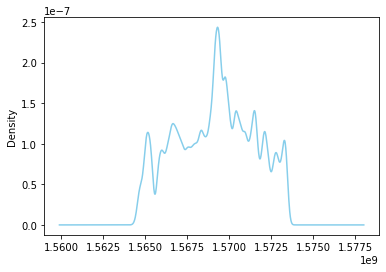

Density plot for feature: device_height


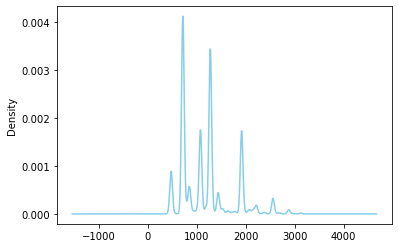

Density plot for feature: device_width


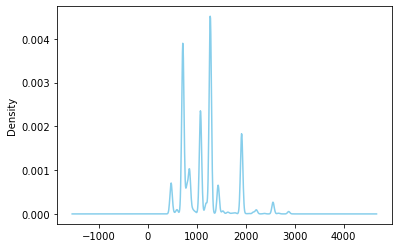

Density plot for feature: clicked


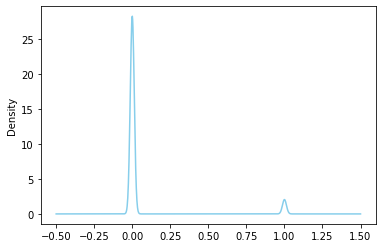



This is the pair plot for numeric cloumns


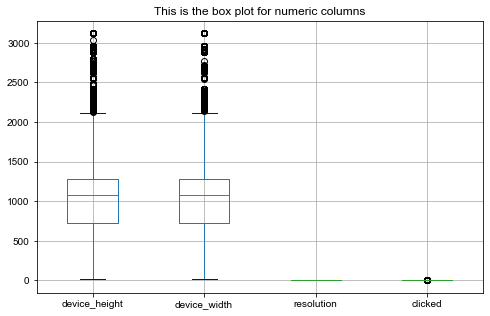

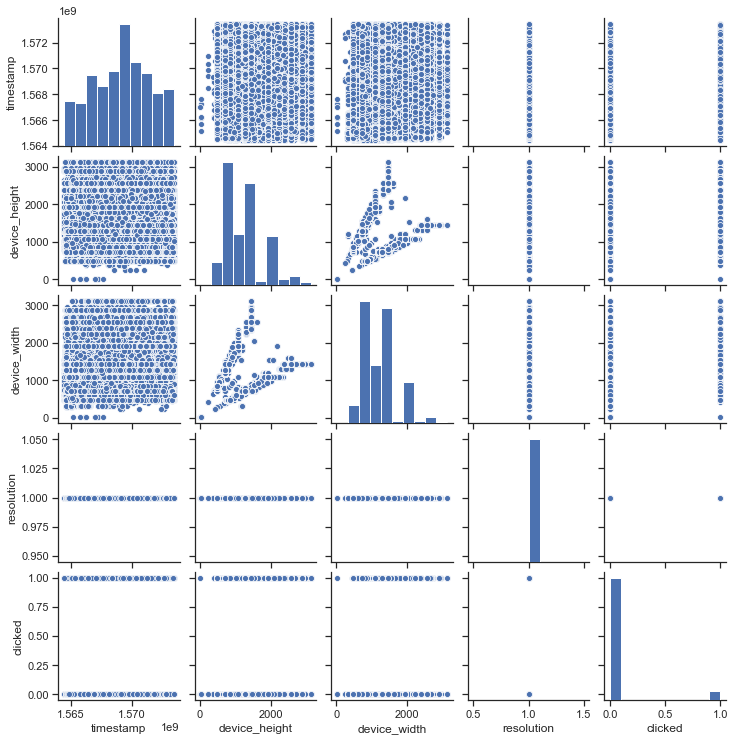

In [14]:
# call the main function
data_visualization = data.copy()
data_visualization = data.replace(True,1)

# Convert trueqfalse to 1/0 
data_visualization = data_visualization.replace(False,0)
data_visualization = data_visualization.replace(True,1)

main_visualizations(data_visualization)

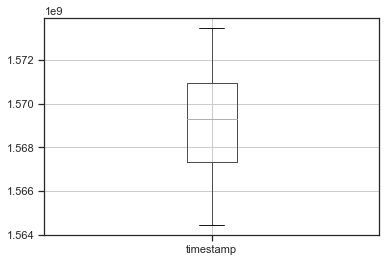

In [15]:
# Show the Box-Plot for timestamp column (because of the resolution of the y axis (we seperate it)
data[['timestamp']].boxplot()  

### C- Delete features according to correlation matrix
we deleted the resolution column because it has only 1 value ('1-True') so it's variance is 0 and it does contribute nothing to the learning of the data. Beyond that, this can also be seen in the statistics we printed for the columns - the maximum and minimum value in this column is 1 and the variance is 0. And we learned that with variance of 0 we cannot learned anything. <br> In addition, we note that we did not see any significant correlations so the highest is -0.19 which is considered a relatively low correlation. Hence we did not delete columns due to high correlation. <br>
We will also delete the op_id column because it's id for one record so we have 2519056 uniques values - it's the number of rows in the data so it's doesn't contribue.  <br>
The last column that we will delete is the app_id because it's categorial column that have a lot of categories that we don't want to deal with them. In addition app_cat column is derived from app_id column and contain more relavant data so we will use it only.
<br> We deleted also the 'device_model' column becuase it has high correlation (0.72) with the 'manufacturer' column. This is column with a lot of categories comparing to the 'manufacturer' column. In addition in this 2 columns we have a lot of missing values and we are thinkning that in the manufacturer column we can fill it better. The manufacturer column is a kind of generalization for the device_model column.
<br> <b> As we have actually stated we will enable this deletion in the main functions

In [16]:
# this is what we will do in the main functions for train/test

# data=data.drop('resolution', axis=1) # delete the resolution column
# data=data.drop('op_id', axis=1)      # delete the op_id column
# data=data.drop('app_id', axis=1)

# test=test.drop('resolution', axis=1) # delete the resolution column
# test=test.drop('op_id', axis=1)      # delete the op_id column
# test=test.drop('app_id', axis=1)

### D- Adasyn- inbalance data

<b> split data- </b> to features and labels and comparing the number of tags to 0 and 1

In [17]:
# This function get data and divide it into 2 lists: 1- for all the features we have 2- for all the labels for each row.
def get_data_labels(data):
    features=data.loc[:, data.columns != 'clicked']      # Get the columns of all the feature except the labels  
    labels_row=data.loc[:,data.columns =='clicked']      # Get the label column
    return features,labels_row

<b> ratio for labels </b> Show the labels and the ratio for each one

In [18]:
# This function get the list with the labels and count the number of '0' label and '1' label.
# Finally it plot a pie chart with these count for visualization.
def showlabelpie(labels_row):
    print('Below you can see a Pie figure of the clicked and not clicked rows')
    lable_0=np.count_nonzero(labels_row==0)                            # The number of 0 label
    lable_1=np.count_nonzero(labels_row==1)                            # The number of 1 label
    labels = 'False-0', 'True-1'                                       # Save the name of the labels
    sizes = [lable_0,lable_1]
    color=["royalblue","deeppink"]                                     
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels,colors=color, autopct='%1.1f%%',      # Create pie chart for the comparison
            shadow=True, startangle=90)
    ax1.axis('equal')                                                  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Comparison of lables: 0 (False), 1 (true)\n')           # Add a title
    plt.legend(labels,loc=3)                                           # Add legend for the plot
    plt.show()

Below you can see a Pie figure of the clicked and not clicked rows


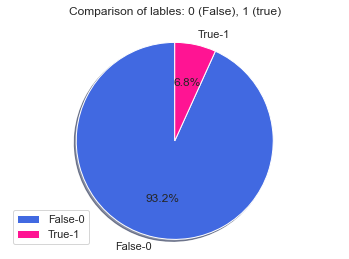

In [19]:
labels_row=get_data_labels(data_visualization)[1]   # split to data and labels
showlabelpie(labels_row)              # plot the pie chart

<b> Explanation: </b> <br>
As we see, the data contains only 6.8% of records that are labeled as clicked = 1 and 93.2% of records that are labeled as clicked = 0. It can be clearly seen that the data is not balanced and we need to take care of that in order to get optimal training. <br> We know that it is usually the data that is labeled as a minority that is more important, especially in this case. Hence we need to take care of the balance so that the data is not skewed towards the majority. <br> <br>
<b> Adasyn: </b> <br>
This method defines how we will sample the samples we want to replicate from the minority group. The method produces a density function for each minority group described by probability. The desire is to take samples from the minority that are difficult to learn so that their probability is not significant and this is because the places where the model is wrong are the points that are best to learn from. <br>
The method calculates the degree of imbalance so that if the ratio is lower than a certain threshold we start with an algorithm where we calculate how much we have to produce from the minority to reach the threshold value and then for each sample from the minority we find KNN and compute an r_i ratio that will give us a majority-minority ratio in the KNN. If this ratio is high then it is more difficult to study in this neighborhood. Normalize to r_i in order to have a probability function and calculate the g_i which is the amount of samples we want to add to each sample. From this we will produce this quantity for each sample by randomly selecting a neighbor from the minority group.<br>
<b> The performance of the model with and without the adasyn will be examined later in the code, after we have performed all the pre processing on the data.

In [20]:
def make_adasyn(x,y):
    ad = ADASYN(random_state=42)            # create adasyn object
    X_res, y_res = ad.fit_resample(x, y)    # fit&resample on adasyn with the data
    return X_res, y_res

--------------------------------------------------------
## 3.Missing_values

In this part, we will explore the missing values and decide what to do with them.
<br> <b> It should be noted that the completion of the missing values was done in the main functions. <br>
the explanation will be in this section but will actually be done in the main function.

----------------------------------------------------------

Shows how many nulls the data has for each column but in precentage in addition to the absuloute number

In [21]:
def show_nulls(data):
    total = data.isnull().sum().sort_values(ascending=False)                                # show the nulls for each columnn id descending order
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100  # convert the absoulute number to precentage
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])                 # contact the data with the numbers and precantages
    print ('Here we can see the number of null for each column:')
    print(missing_data)
show_nulls(data)

Here we can see the number of null for each column:
                 Total          %
manufacturer    770942  30.604401
device_model    770846  30.600590
user_isp            32   0.001270
clicked              0   0.000000
resolution           0   0.000000
device_width         0   0.000000
device_height        0   0.000000
device_version       0   0.000000
banner_pos           0   0.000000
app_cat              0   0.000000
app_id               0   0.000000
state                0   0.000000
timestamp            0   0.000000
op_id                0   0.000000


<b> Explanation: </b> <br>
It can be seen that there are 2 categorical columns containing over 30% missing values. We don't want to remove columns from the data that can contribute and in addition we do not want to fill the values with the most common value that can ruin the performance of the model. Therefore for them any value that was missing became a category called name_column_missing values. There is another category column which contains only 32 missing values so for it we decided to add the most common value in its categories.

--------------------------------------------------------
## 4.Feature_engineering

In this part, we will add new columns by feature engineering.
<br> <b> The explanation and the functions will be in this section but will actually be done in the main function. </b> <br>

----------------------------------------------------------

<b> 1. banner_pos: </b>Adding a new column by feature engineering of the banner column. <br>
After examining this column we saw that there are 4 categories where clicked the button and 4 categories where did not click the button. From here we chose to change the column with different importance to the categories that clicked/did not click accordingly so clicking with higher importance.

In [22]:
def create_ranked_col_for_banner(col):
    if col=='top-left' or col == 'center' or col=='left' or col=='top':   # if the position in the 4 important columns so save it as 1
        return 1
    else:                                                                 # if the position not in the 4 important columns so save it as 0
        return 0

<b> 2. categorial columns: </b> In the category columns, in order to avoid a high dimension we have chosen to merge less common categories into one category under the name 'others'. Later after running dummies columns will be created as the number of categories we left and in particular the new category we created. (We have transformed the data by reducing the number of columns for the categorical features.) <br> We created a dictionary (dict_treshold) for each category columnWe have checked what will be the threshold for each column and ran over the data and all the categories that their value counts was lower than the specific threshold and labeled them as 'other'.

In [23]:
# we check the treshold with this code for each categorial column:
# pd.DataFrame(data['manufacturer'].value_counts()).head(10)
dict_treshold = {'manufacturer': 100000, 'device_version': 300000, 'app_cat': 200000, 'user_isp': 200000,'state' : 100000}

For the column user_isp: We have filled the nulls with the most common value in this column because there were a few nulls (32). Then, we used the same method for the rest of the categories in this column.
For both 'manufacturer' and 'app_cat' there were nulls in the coumn. We replaced the nulls in the value of 'missing ' + the column name, so we will know that they were nulls and we want them to have a special column in the future (on dummies stage)

In [24]:
# this function get the dict_tresholf for the columns, the data and specific columns and return the data after
# the changes and the dictionary that will be send to the test (contatin for each column the unique values)
def transformdata (data, columns,dict_treshold):
    dict_values = {}                                              # create a dictionaty that will be sent to the test. For each column, it will keep it's uniuque values.
    for column in columns:
        if column in ['manufacturer','app_cat']:                  # these columns has np.nan and we will replace it by the word missing and the name of the column
            name = 'missing '+column
            data[column] = data[column].replace(np.nan,name)      # replace the nan in the new name
        
        d_values=pd.DataFrame(data[column].value_counts())        # calculate for each category it's count
        
        if column=='user_isp':                                    # For this column we will fill the nulls with the most common value
            data['user_isp'] = data['user_isp'].fillna(d_values.index[0])
            
        list_values=list(d_values[d_values[column]<dict_treshold[column]].index)  # check where the count lower than the treshold from the dictionary
        data[column]=data[column].replace(list_values,'other '+column)            # replace the name in these indexes to 'others' column
                                     
        unique_values = list(data[column].unique())               # for each column save a list with the unique values
        dict_values[column] = unique_values                       # save for test
            
    return data, dict_values

In [25]:
# this function get a column, the dict_values from the train data and for each value in the column if it is not in the 
# categories that saved in the train it will be changed to 'others' column.
def change_test(string,col, dict_values):
    if string not in dict_values[col]:       # Check if the value of this category is not in the list from the train data
        return 'other '+col                  # Return this choice- change to 'others' column
    else:                                    # if the value of this category is in the list from the train data
        return string                        # do not change the value

In [26]:
# this function will be applied for the test set but with the values that we have from the train set so it will be the same.
# the function gets the data, specific columns and the dictionary values from the train. it returns the data after cahnges.
def transformdata_test (data, columns, dict_values):
    for column in columns:
        if column in ['manufacturer','app_cat']:                                  # these columns has np.nan and we will replace it by the word missing and the name of the column
            name = 'missing '+column
            data[column] = data[column].replace(np.nan,name)                      # replace the nan in the new name
        
        d_values=pd.DataFrame(data[column].value_counts())                        # calculate for each category it's count
        
        if column=='user_isp':                                                    # For this column we will fill the nulls with the most common value
            data['user_isp'] = data['user_isp'].fillna(d_values.index[0])
        
        data[column]=data[column].apply(change_test, args=(column, dict_values))  # change the column according to the train
        
    return data

3-4. <b> area and ratio of the screen: </b> we chose to create a new column of the area (height*width), and a new column of the ratio (height/width). Both columns will help us understand the shape of the device. For example, if the ratio is close to 1, that means that the shape of the device is close to squere and from the screen's area We can check the effect of the area size on the click / non-click. <br>
<b> This is what we will do in the main function for the train and we will do it also for the test.

In [27]:
# new_data_after_adasyn['area']=new_data_after_adasyn['device_height']*new_data_after_adasyn['device_width']
# x_internal_test['area']=x_internal_test['device_height']*x_internal_test['device_width']
# new_data_after_adasyn['ratio']=new_data_after_adasyn['device_height']/new_data_after_adasyn['device_width']
# x_internal_test['ratio']=x_internal_test['device_height']/x_internal_test['device_width']

<b>5-6. ratio for clicked to state and banner_pos columns: </b> We decided for these 2 columns to take the ratio of the number of clicks to each category in the column in relation to the total records. This is to see if there is an effect of the percentage of positives in each specific category on learning. We chose to take the state column because it has a lot of categories in it and so we will get a numeric value column that will not lose its meaning in dummies with the 'others' column. We chose the banner_pos column because we saw that it has categories where there were a lot of clicks compared to categories where there were 0 clicks and therefore we thought that the percentage of clicks has an effect on learning as well.

In [28]:
def create_hash(df,list_for_key):
    print('Creating hash')
    d={}                                       # create dictionary that will save for the name of category the cliked and total rows
    for i,row in df.iterrows():
        key = tuple(list(row[list_for_key]))   # The key will be the name of the category
        clicked = row['clicked']               # the number of clicks
        tests = row['op_id']                   # the number of sample
        d[key] = [clicked, tests]              # The value is an array which it's first index is the number of clicks and the second is the number of samples
    return d

In [29]:
def calc_clicked_ratio(list_for_key,hash_df):
    tests=0
    clicked=0
    key=tuple([list_for_key]) # The key will be the name of the category
    [clicked_i,tests_i] = hash_df[key] if key in hash_df else [0,0] # If there is a value in the dictionaty, we will use it. Else, we will fill 0.
    clicked+=clicked_i
    tests+=tests_i
    return 0 if tests==0 else clicked/tests # Fill the value in the DataFrame

--------------------------------------------------------
## 5.Data_Normalization

In this part, data normalization is performed. As we have learned normalization is mainly related to distances and similarity in models. However for the models selected below there is no reference to distances or similarity but we know that normalization may improve the model performance so we have added the functions for it so that we can later decide whether to use it or not.
<br> <b> The explanation and the functions will be in this section but will actually be done in the main function. </b> <br>
In the data exploration phase, we saw that each feature had a different scale distribution and therefore the data should be normalized. Beyond this, normalization is important as models may be affected by a greater or lesser range and this may cause bias in the results. We chose to use the Z-score normalization method to fit each feature to a standard normal distribution scale while retaining its original distribution. 

----------------------------------------------------------

In [30]:
# standard_scaler- This function get data frame and standart scaler object if we are on the test set.
# the function choose the numeric columns and create standart scaler object and fit and transform the data with it.
# If we are on the test set we will use the object from the train test and transform it.
def Normalize(Dataframe,standard_scaler=False):
    df_2=Dataframe.select_dtypes(include=['float64', 'int64'])                                                      # Create a data with the types that we want
    print(df_2.head())
    if not standard_scaler:
        standard_scaler = StandardScaler()                                                                          # We initialize our scaler
        standard_scaler.fit(df_2)                                                                                   # We fit our scaler 
        return pd.DataFrame(standard_scaler.transform(df_2),index=df_2.index,columns=df_2.columns),standard_scaler  # We transform our data using the scaler we have just fit. (original index)
    else:
        return pd.DataFrame(standard_scaler.transform(df_2),index=df_2.index,columns=df_2.columns)                  # We transforn our test according the train set    

In histograms we have seen that these 2 columns are skewed so that there is no equal probability of falling on either side of the distribution. Therefore LOG replacement can help treat the bias hence its use.

In [31]:
# The function below will make a log function for both the height and width columns. 
# Then it will replace the oroginal columns by the new log columns
def make_log_for_height_and_width(data):
    # apply log on this 2 column
    data['device_height']=np.log2(data['device_height'])
    data['device_width']=np.log2(data['device_width'])
    # rename for these columns
    data=data.rename(columns={'device_height':'log_device_height','device_width':'log_device_width'})
    return data

--------------------------------------------------------
## 6.Training

In this part, we will perform the model training. First we will activate all the functions of the pre-processing that we talked about in the sections above, such as delete columns, filling missing values, etc. <br>
We will then split the data into a training set and a validation set (for an internal exam) since the external exam is a separate data set. <br>
We then selected 3 models for the training and performed a hyper-tuning for them to select the optimal parameters and considered them various measures. After all this we will select the model that received the best metrics and with it we will use for the following parts.

-----------------------------------------

### A- First, we will create few functions that will help us in the main functions.

<b> divide categorial&numeric columns: </b> Check which columns are categorical and which columns are numeric. <br>
This function get the data and divide it into 2 lists: 1-list of the numeric columns 2-list of the categorial column.

In [32]:
def Divide_data_by_type(dataframe):
    number_cols=list(dataframe.columns[dataframe.dtypes != 'object'])        # Save the index of each numeric columns
    category_cols=list(dataframe.columns[dataframe.dtypes == 'object'])      # Save the index of each category columns
    print ('The categorial columns are:',category_cols)
    print ('The numerical columns are: ',number_cols)
    return number_cols,category_cols

<b> contact data: </b> Function for contact the data if the data dividee to categorial columns from type 'object' and numerical columns. <br>
The function get the original data and the data after some process such as the normalization. It take the categorial columns from the original data and attach it to the numerical data after some process.

In [33]:
def concat_numerical_object(data,data_norm):
    df_3=data.select_dtypes(include=['object','uint8'])                         # Create a data with the columns from object type
    df_after_process = pd.concat([data_norm,df_3] , axis=1, join='inner')     # Connectors between the 2 data frames we have (categorial and numerical)         
    return df_after_process

<b> dummies: </b> dummies function will do the One-hot-encoding proccess and convert all the categorial columns to binary according to thier categories. So models who cannot deal with categorial columns will work.

In [34]:
def dummies(data,cols):
    categorial_data=data.loc[:,cols]                                  # Save the data only for the categorial columns
    dummies_data=pd.get_dummies(categorial_data)                      # Change the categorial columns to binary
    all_data=pd.concat([data, dummies_data], axis=1)                  # Attach the original data in the input with the binaries columns
    data_after_dummies= all_data.drop(categorial_data, axis=1)        # Delete the original categorial columns
    return data_after_dummies

<b> PCA: </b> We want to select features that have values with maximum variance explained by the PCA. The method is effective because when we restore the original vector it may lose information but it is assured that we will lose as little information as possible and hence the total square error will be the minimum. The function will first create a plot that visually represents the cumulative explained variance and then create a PCA object with the cumulative covariance explained that choosen(with us 95%). <b> Despite the many benefits of PCA we decided to test it in the main function but chose not to use it and reduced columns through the trnasorm data and the thresholds we chose to leave as separate categories and as a others category. We chose not to do this because PCA does not keep the column names and we cannot know which columns remain after activation and this information is important to us for the next part where we will perform the SHAP. </b>

In [35]:
def pca_cols (data,cols,threshold,pca=False):  
    relevant_data=data.loc[:,cols]                                     # Save the data only for the numeric columns
    if not pca:
        pca_num=PCA(n_components=relevant_data.shape[1])               # Initialize PCA object
        pca_num=pca_num.fit(relevant_data)                             # Fit the model with the data
        pca_exp=pca_num.explained_variance_ratio_                      # Percentage of variance explained by each of the selected components

        print ('\n\nFor visualization this is the cumulative explained variance plot for each numeric column')
        plt.plot(np.cumsum(pca_exp), color='blueviolet')               # Plot for visualozation- the number of components vs cumulative explained variance
        plt.xlabel('number of components')                             # Add title for x-axis
        plt.ylabel('cumulative explained variance')                    # Add title for y-axis
        plt.grid()                                                     # Add grid for the plot
        plt.show()                                                     # show the plot

        print ('\nNow we apply the pca that will explain at least ',threshold*100,' %')
        pca=PCA(threshold)                                             # Initialize PCA object that will explain 0.995 
        pca=pca.fit(relevant_data)                                     # Fit the model with the data
        pca_explain=pca.explained_variance_ratio_                      # Percentage of variance explained by each of the selected components
        print ('\nThe cumulative explained variance for this pca action is:',sum(pca_explain))
        data_after_pca=pd.DataFrame(pca.transform(relevant_data))      # Apply the PCA on the train data 
        return data_after_pca,pca
    else:
        data_after_pca=pd.DataFrame(pca.transform(relevant_data))      # Apply the PCA on the test data 
        return data_after_pca

### B- we will apply the main function with the pre-processing on the data and the split to train%valisation (internal test) 
In the beginning we create a copy for the data. Then we will deal with the columns that we want to change their values. After that we delete some columns as we explained above and add new fearures from the features engeneering. Then we apply the dummies for the categorial columns and split the data to train and validation so we can apply the adasyn only on the train. Finally we apply the normalization on the data and the PCa if we choose to use it and getting the final train and validation data.

In [36]:
# we determined seed so we will get the same result
np.random.seed(300)

In [37]:
# this function get data, dict tresholג for the features engeneering and pca and adasyn (false mean not use)
# return all the objects we need for the test pre-proccessing
def main_train(df, dict_treshold, adasyn=True,pca=False):
    data=df.copy()                         # make a copy to the data
    # convert in train set
    data = data.replace(True,1)
    data = data.replace(False,0)
    data = data.replace('unknown',np.nan)
    
    # show nulls in the data
    show_nulls(data)
    
    # Show some plots
    showheatmap(data)                      # show heat map only for the numeric columns
    get_histogram(data)                    # show histogram for the numeric columns
    labels_row=get_data_labels(data)[1]    # Get the data label
    showlabelpie(labels_row)               # Show the part of the label from the data

    Types=Divide_data_by_type(data)        # Print the type of the columns

    # Drop the columns that were not usefull
    data=data.drop('resolution', axis=1)  # delete the resolution column
    data=data.drop('app_id', axis=1)      # delete the app_id column
    
    data['ranked_banner']=data['banner_pos'].apply(create_ranked_col_for_banner)    # Create a new column for the banner
    
    # shoe the heatmap- we will see that device model is correlated to the manufacturer so we will delete it
    print('Heatmap of all the features:')
    all_features_corr=data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) # get the correlation with the categorial columns but with pearson method
    showheatmap(all_features_corr)
    data=data.drop('device_model', axis=1)      # delete the device_model column
    
    
    hashed_list=[]                          # Creating an empty list for the test data
    list_for_keys=['banner_pos','state']    # The categorial columns that we will calculate their clicked ratio
    for key in list_for_keys:               # For each category, calculate the clicked ratio 
        list_for_key=[key]
        df_agg=data.groupby(list_for_key).agg({'clicked':sum,'op_id':len}).reset_index()
        # apply the feature engeneering for the ratio of clicks
        hash_df=create_hash(df_agg,list_for_key)
        data[key+'_clicked_ratio']=data.apply(lambda row:calc_clicked_ratio(row[key],hash_df),axis=1)  # Calculate the clicked ratio and create new column
        hashed_list.append(hash_df)
    
    # another feature engeneering for the cateogiral columns to reduce the dimension that will be after the dummies
    new_data, dict_values = transformdata(data, ['manufacturer', 'device_version', 'app_cat','user_isp','state'],dict_treshold)
    
    new_data=new_data.drop('op_id',axis=1)  # delete the op_id column
    
    # apply the dummies for the categorial columns
    new_data_after_dummies=dummies(new_data,['state','user_isp','app_cat','banner_pos','manufacturer','device_version'])
    
    # divide the data into features and labels
    X, y = get_data_labels(new_data_after_dummies)
    # devidie the data to train and internal test- The test and train data are splitted into features and labels
    x_train,x_internal_test,y_train,y_internal_test=train_test_split(X,y,test_size=0.3,shuffle=True, random_state=42)
    new_data_after_adasyn = x_train
    y_res = y_train
    if adasyn:
        # apply the adasyn 
        X_res,y_res=make_adasyn(x_train,y_train)
        # save the data withput the labels
        new_data_after_adasyn=X_res

    # apply another feature engeneering on the train and validation
    new_data_after_adasyn['area']=new_data_after_adasyn['device_height']*new_data_after_adasyn['device_width']
    new_data_after_adasyn['ratio']=new_data_after_adasyn['device_height']/new_data_after_adasyn['device_width']
   
    x_internal_test['area']=x_internal_test['device_height']*x_internal_test['device_width']
    x_internal_test['ratio']=x_internal_test['device_height']/x_internal_test['device_width']
    
    # Normlize the data with log and standart scaler for train and validation
    new_data_after_adasyn=make_log_for_height_and_width(new_data_after_adasyn)
    new_data_after_Normalize,scaler=Normalize(new_data_after_adasyn)
    
    x_internal_test=make_log_for_height_and_width(x_internal_test)
    new_internal_test_after_Normalize=Normalize(x_internal_test,scaler)
    # contact the numerical and cateogiral columns into 1 data for train and validation
    new_data_after_Normalize=concat_numerical_object(new_data_after_adasyn,new_data_after_Normalize)
    new_internal_test_after_Normalize=concat_numerical_object(x_internal_test,new_internal_test_after_Normalize)
    
    if pca:            # if we want to use PCA
        # save lists for the categorial columns (after dummies) and numerical columns
        unit8_cols= list(new_data_after_Normalize.select_dtypes(include=['uint8']).columns)
        numeric_cols=list(new_data_after_Normalize.select_dtypes(exclude=['uint8']).columns)
        # apply the PCA seperatly for the numerical and dummies and contact them after- for the train set
        unit8_df_afret_pca,PCA_unit8=pca_cols(new_data_after_Normalize,unit8_cols,0.95)
        numeric_df_afret_pca,PCA_numeric=pca_cols(new_data_after_Normalize,numeric_cols,0.95)
        final_train_data=pd.concat([numeric_df_afret_pca,unit8_df_afret_pca] , axis=1)
        # apply the PCA seperatly for the numerical and dummies and contact them after- for the validation set
        unit8_df_internal_test_after_pca=pca_cols(new_internal_test_after_Normalize,unit8_cols,0.95,PCA_unit8)
        numeric_df_internal_test_after_pca=pca_cols(new_internal_test_after_Normalize,numeric_cols,0.95,PCA_numeric)
        final_internal_test=pd.concat([numeric_df_internal_test_after_pca,unit8_df_internal_test_after_pca] , axis=1)
    
    else:             # if we don't want to use PCA
        # save the final data for theh train and validation
        final_train_data = new_data_after_Normalize 
        final_internal_test = new_internal_test_after_Normalize
        # save the pca as false for the test
        PCA_unit8=False
        PCA_numeric=False
    # save the lables column for the train and validation
    train_labels = y_res
    internal_test_labels = y_internal_test
    # save all the columns we have in the train data for the test set
    col=list(final_train_data.columns)
    
    return scaler,final_train_data,train_labels,final_internal_test,internal_test_labels,PCA_unit8,PCA_numeric,col, dict_values,hashed_list


Here we can see the number of null for each column:
                 Total          %
manufacturer    770942  30.604401
device_model    770846  30.600590
app_cat         596348  23.673471
user_isp            32   0.001270
clicked              0   0.000000
resolution           0   0.000000
device_width         0   0.000000
device_height        0   0.000000
device_version       0   0.000000
banner_pos           0   0.000000
app_id               0   0.000000
state                0   0.000000
timestamp            0   0.000000
op_id                0   0.000000
Here we can see the corralation heatmap of the columns:


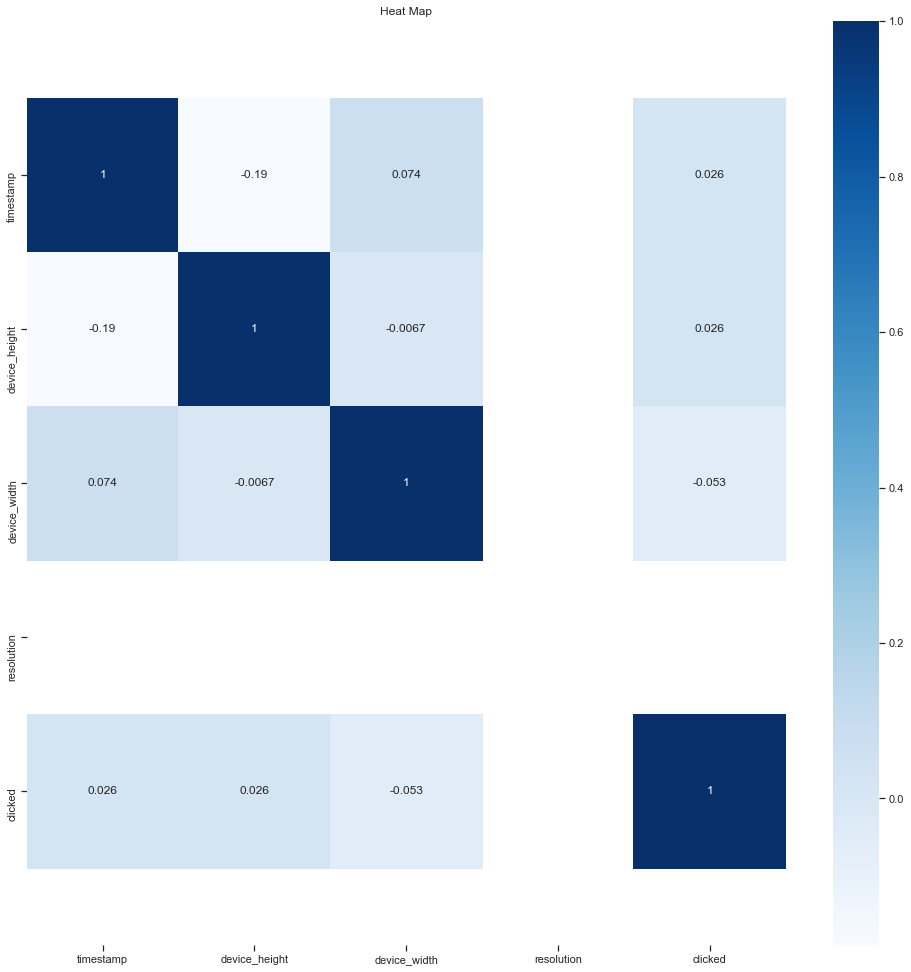

Histogram for feature: timestamp


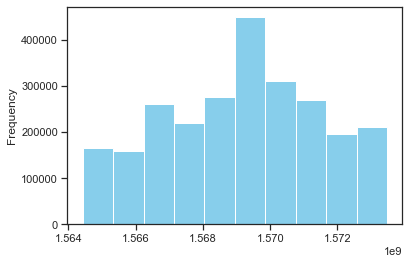

Histogram for feature: device_height


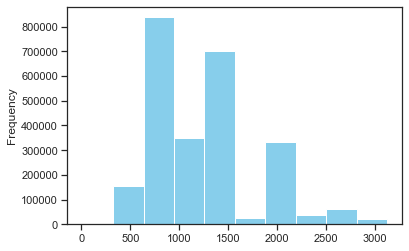

Histogram for feature: device_width


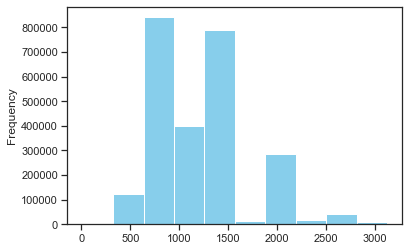

Histogram for feature: clicked


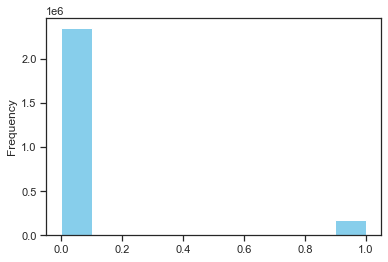

Below you can see a Pie figure of the clicked and not clicked rows


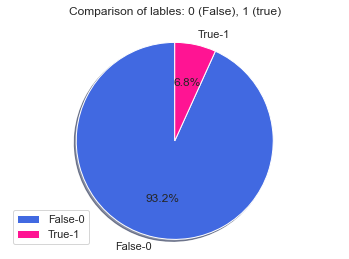

The categorial columns are: ['op_id', 'state', 'user_isp', 'app_id', 'app_cat', 'banner_pos', 'manufacturer', 'device_model', 'device_version']
The numerical columns are:  ['timestamp', 'device_height', 'device_width', 'resolution', 'clicked']
Heatmap of all the features:
Here we can see the corralation heatmap of the columns:


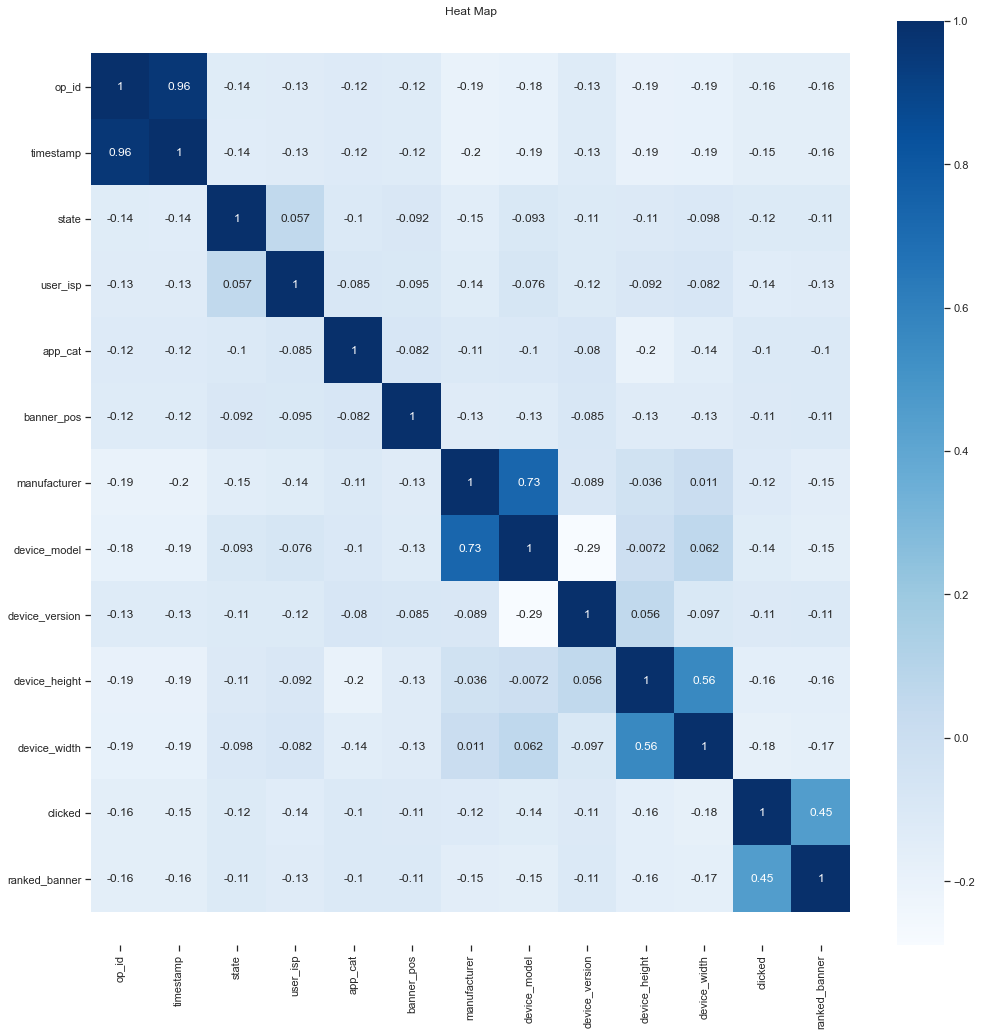

Creating hash
Creating hash



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


    timestamp  log_device_height  log_device_width  ranked_banner  \
0  1568089499          10.076816         10.906891              0   
1  1570573693           9.738092          8.906891              0   
2  1572741892           9.491853         10.321928              1   
3  1568167510          10.321928          9.491853              0   
4  1571967740          10.906891         10.076816              1   

   banner_pos_clicked_ratio  state_clicked_ratio     area     ratio  
0                  0.000000             0.072501  2073600  0.562500  
1                  0.000000             0.070204   409920  1.779167  
2                  0.141353             0.058183   921600  0.562500  
3                  0.000000             0.053599   921600  1.777778  
4                  0.141054             0.066334  2073600  1.777778  



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


          timestamp  log_device_height  log_device_width  ranked_banner  \
2470622  1570307521          10.321928          9.643856              1   
140152   1565171787          10.906891         10.076816              1   
642034   1570599969          10.076816         10.906891              1   
2482244  1568445177          10.906891         10.228819              1   
904387   1570346400           9.491853         10.321928              1   

         banner_pos_clicked_ratio  state_clicked_ratio     area     ratio  
2470622                  0.139423             0.059899  1024000  1.600000  
140152                   0.141353             0.069187  2073600  1.777778  
642034                   0.141054             0.070204  2073600  0.562500  
2482244                  0.141353             0.065424  2304000  1.600000  
904387                   0.139423             0.066334   921600  0.562500  


In [38]:
# call the main function
scaler,final_train_data1,train_labels1,final_internal_test1,internal_test_labels1,pca_unit8,pca_numeric,columns_from_train, dict_values,hashed_list=main_train(temp,dict_treshold,adasyn =True, pca=False)

In [39]:
# reset index for the columns to be in the same order for the train and validation
final_train_data1=final_train_data1.reindex(sorted(final_train_data1.columns), axis=1)
final_internal_test1=final_internal_test1.reindex(sorted(final_train_data1.columns), axis=1)

 ### C- tuning hyperparameter
 we will apply the grid search for each model to find the best parameters for each model. we decide to use the following 3 models: Logistic regression, Ada boost and XGBoost. <br>
This function will create a GridSerchCV object that will get as input: a model, possible parameters and select parameters according to the roc_auc. Will fit the model by the train set and lables and send the best parameters. <br>
<b>for all the models calling the Gridsearch function takesLong time about few hours. So we chose to run it on our computer separately and here only to show how we would do it. We will use the parameters that came out best for us to run. <br>
All the Explanation for the parameters that we want to check will be in the running window corresponding to the model.

In [40]:
def Gridsearch(classifier,parametersOptions,final_train_data,train_labels):     # This funcion receives a classifier, dictionary of options for the parameters, and the train data.
    GS = GridSearchCV(classifier, parametersOptions,cv=3, scoring='roc_auc')    # Create a Gridsearch object for the relevant classifier,parameters options, cross-validation generator, and scoring method
    GS.fit(final_train_data, train_labels)                                      # Fit the GS object

    print ('Chosen parameters (recieved best AUC): {}'.format(GS.best_params_))
    print ("AUC score with the chosen parameters: ", GS.best_score_)
    return GS.best_params_ 

<b>1. Logistic Regression model

In [41]:
# Creating dictionary of options for the parameters
LR_parametersOptions={'penalty':['l1','l2'],                                                 # Used to specify the norm used in the penalization
                      'dual':[False],                                                        # Default Dual or primal formulation
                      'tol':[0.0001],                                                        # Default Tolerance for stopping criteria.
                      'fit_intercept':[True],                                                # Default Specifies if a constant
                      'intercept_scaling':[1],                                               # Default 
                      'class_weight':[None],                                                 # Default Weights associated with classes in the form
                      'random_state':[None],                                                 # Default 
                      'max_iter':[100],                                                      # Default Maximum number of iterations taken for the solvers to converge
                      'multi_class':['auto'],                                                # Default 
                      'verbose':[0],                                                         # Default set verbose to any positive number for verbosity
                      'warm_start':[False],                                                  # Default 
                      'n_jobs':[None],                                                       # Default Number of CPU cores used
                      'l1_ratio':[None],                                                     # Default The Elastic-Net mixing parameter
                      'C':[0.01, 0.06,0.09,0.1,0.2,0.22,0.27,0.29,0.3,0.31,0.35,0.5,0.7],    # Inverse of regularization strength
                      'solver':['liblinear'] }                                               # Algorithm to use in the optimization problem.      

# Call the Gridsearch function
#parameters_LR=Gridsearch(LogisticRegression() ,LR_parametersOptions,final_train_data1,train_lables1.values.ravel())   # Call the Gridsearch function

parameters_LR={'penalty': 'l2',                                                
                  'dual': False,                                                
                  'tol': 0.0001, 
                  'fit_intercept': True,                                               
                  'intercept_scaling': 1,                                             
                  'class_weight': None,                                    
                  'random_state': None,                                                
                  'max_iter': 100,                                                     
                  'multi_class': 'auto',                                               
                  'verbose': 0,                                                
                  'warm_start': False,                                      
                  'n_jobs': None,                                        
                  'l1_ratio': None,                            
                  'C': 0.7, 
                  'solver': 'liblinear'} 

In [42]:
# Creating Logistic Regression model with the best hyper parameters that found.
LR_clf = LogisticRegression(**parameters_LR)  # Using the best parameters    

<b>2. Adaptive Boosting model

In [43]:
AB_parametersOptions={'n_estimators':[30,50,100,400],       # The maximum number of estimators at which boosting is terminated.
                      'base_estimator': [None],             # Default-The base estimator from which the boosted ensemble is built- If None, then the base estimator is DecisionTreeClassifier(max_depth=1).
                      'learning_rate':[1,0.1,0.5,2],        # Learning rate shrinks the contribution of each classifier by learning_rate
                      'algorithm':['SAMME', 'SAMME.R'],     # Choose the best algorithm
                      'random_state': [None]}               # Default for seed

# Call the Gridsearch function
# parameters_AB=Gridsearch(AdaBoostClassifier() ,AB_parametersOptions,final_train_data1,train_lables1.values.ravel())

AB_parameters1={'n_estimators':400,       
                 'base_estimator': None,
                 'learning_rate':0.5,
                 'algorithm':'SAMME.R',
                 'random_state': None}    
# AUC score with the chosen parameters:  0.9526380428471287

In [44]:
# Creating  Adaptive Boosting model with the best hyper parameters that found.
AB_clf=AdaBoostClassifier(**AB_parameters1)

<b>3. XGBoost model

In [45]:
xgb_parametersOptions = {'min_child_weight':[2,4,5],                # Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.
                        'gamma': [0.5,1,1.5],                       # Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
                        'subsample': [0.1,0.6,1],                   # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.
                        'colsample_bytree':[0.1,0.6,1],             # Is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
                        'max_depth': [1,3,5],                       # Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.
                        'use_label_encoder': False,                 # Use the label encoder from scikit-learn to encode the labels. For new code, we recommend that you set this parameter to False.
                        'scale_pos_weight':7}                  # Control the balance of positive and negative weights, useful for unbalanced classes. We used: sum(negative instances) / sum(positive instances)=13.7
                
# Call the Gridsearch function
# parameters_xgb=Gridsearch(XGBClassifier(use_label_encoder=False),xgb_parametersOptions,final_train_data1,train_labels1.values.ravel().astype(int))

xgb_parameters1= {'colsample_bytree': 0.6,
                   'gamma': 1.5,
                   'max_depth': 5,
                   'min_child_weight': 2,
                   'subsample': 1,
                   'use_label_encoder': False,
                   'scale_pos_weight':13.769}
# AUC score with the chosen parameters:  0.9550468764100827

In [46]:
# Creating XGBoost model with the best hyper parameters that found.
xgb_clf = XGBClassifier(**xgb_parameters1)

### D- Train the model and get measures
In this part we will present a Confusion Matrix for each model and calculate different measures as recall, precision, F score, accuracy. In addition we will caculate the AUC on the validation set and apply K-Fold on the train set to show the AUC also.

In [47]:
# Now we will save the 3 chosen models so we use them-Create list with all the classifiers that we chose.
clfs=[xgb_clf,LR_clf,AB_clf]

<b> AUC on validation-internal test: </b>This function get the validation data and labels, a classiffier and train data& labels. it fit on the train and predict on the validation. finally it calculate the AUC and print it. 

In [48]:
def evaluate_cv(X,y,clf,train_data,train_labels):
    clf1 = clf                                                        # our classifier
    clf1.fit(train_data,train_labels)                                 # fit the model 
    predict=clf1.predict_proba(X)                                     # Predict the probabilities of the test data to be clicked
        
    y_predict_proba= [v[1] for v in predict]                          # chabge to a list
    fpr, tpr, thresholds = metrics.roc_curve(y,y_predict_proba)       # calc fpr and tpr with roc curve 
    return clf1,metrics.auc(fpr,tpr),fpr,tpr,y_predict_proba 

In [49]:
# apply the above function for each model
for clf in clfs:
    # save data and lebels for validation
    X = final_internal_test1.copy()
    y = internal_test_labels1.copy()
    # calc the AUC for each classifier
    clf,auc,fpr,tpr,y_pred_proba= evaluate_cv(X,y,clf,final_train_data1.copy(),train_labels1.copy().values.ravel())
    print('for ',clf)
    print("The AUC is: ", auc)

[00:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
for  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=13.769, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
The AUC is:  0.8621897365027239
for  LogisticRegression

<b> Confusion Matrix: </b> for each model this function fit on the train, predict on the validation and calculate some measures that derive from the matrix measures (TP,FP,TN,FN). <br>
It should be noted that apart from the F score, we chose all measures to use weighted, because this is an imbalanced data set (validation set), so we would like to give different importance to labeling, which is a minority against the majority. The F score takes into account the precision & recall mesaures and is a good measure for imbalanced datasets so we also calculated it.

In [50]:
# this function get the train data, validation data, classifier and treshold for the predict proba
def confusion_matrix_for_clf(X,y,clf,train_data,train_labels, threshold):
    print ('Data for clf',clf)
    clf1=clf                                                                    # Choose model
    clf1.fit(train_data,train_labels)                                           # Fit the model                                                         
    y_pred = (clf1.predict_proba(X)[:, 1] > threshold).astype('float')          # Predict probability and decide the lables by the treshold
    cm=confusion_matrix(y,y_pred)                                               # Create a confusion matrix object
    tn, fp, fn, tp=cm.ravel()                                                   # Make the matrix in the right order that we know
    cm_update=np.array([[tp,fp],[fn,tn]])                                       # Save the good matrix


    # Plot the confusion matrix (with heat map)
    sns.heatmap(cm_update, cmap="Blues", annot=True,fmt="d",cbar=False,linewidth=0.3,xticklabels=['1','0'], yticklabels=['1','0'])
    plt.xlabel('Actual')                                                          # Add title to x-axis
    plt.ylabel('Predict')                                                         # Add title to y-axis
    b, t = plt.ylim()                                                             # discover the values for bottom and top
    b += 0.5                                                                      # Add 0.5 to the bottom
    t -= 0.5                                                                      # Subtract 0.5 from the top
    plt.ylim(b, t)                                                                # update the ylim(bottom, top) valu
    plt.show()

    print ('\nNow we will present some measures we learned:')                     # Show measures that we learnes
    print ('-The accuracy is:   ',balanced_accuracy_score(y,y_pred))
    print ('-The recall is:     ',recall_score(y,y_pred, average='weighted'))
    print ('-The precision is:  ',precision_score(y,y_pred, average='weighted'))
    print ('-The specificity is:',str(tn/(tn+fp)))
    print ('-The FPR is:        ',str(fp/(tn+fp)))
    print ('-The F-score is:    ',f1_score(y, y_pred, average='weighted'))


Data for clf XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=13.769, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)
[01:41:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


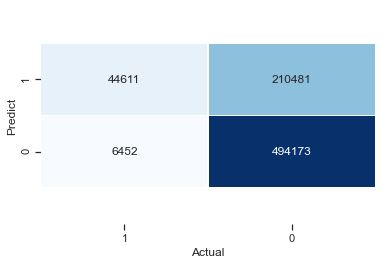


Now we will present some measures we learned:
-The accuracy is:    0.7874725367678936
-The recall is:      0.7129441312025533
-The precision is:   0.9322305789078725
-The specificity is: 0.7012987934504026
-The FPR is:         0.29870120654959736
-The F-score is:     0.7842982389175536
Data for clf LogisticRegression(C=0.7, solver='liblinear')


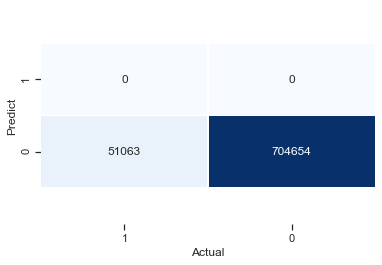


Now we will present some measures we learned:
-The accuracy is:    0.5
-The recall is:      0.9324310555406323


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


-The precision is:   0.8694276733366177
-The specificity is: 1.0
-The FPR is:         0.0
-The F-score is:     0.899827883477457
Data for clf AdaBoostClassifier(learning_rate=0.5, n_estimators=400)


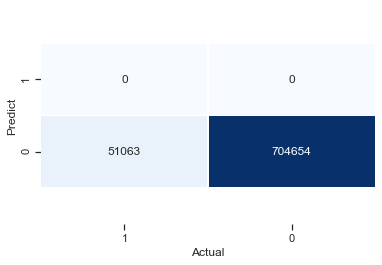


Now we will present some measures we learned:
-The accuracy is:    0.5
-The recall is:      0.9324310555406323


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


-The precision is:   0.8694276733366177
-The specificity is: 1.0
-The FPR is:         0.0
-The F-score is:     0.899827883477457


In [51]:
# apply the cunfusion matrix for each model
for clf in clfs:
    # save data and lebels
    X = final_internal_test1.copy()
    y = internal_test_labels1.copy()
    # call the function
    confusion_matrix_for_clf(X,y.copy().values.ravel(),clf,final_train_data1.copy(),train_labels1.copy().values.ravel(), 0.6)

<b> Explanation for the measures </b> <br>
We chose to explain the results according to the measures came from the XGBoost model, because it is the best model.<br>
As can be seen, most of the measures are around 0.88. We chose all the measures to be weighted, because this is an imbalanced data set (validation set), so we would like to give different importance to labeling, which is a minority against the majority. <br> On the one hand, the accuracy score is low, but on the other hand, the dataset is unbalanced, and therefore, the most important measures are recall,precision and F-score. As can be seen, these features are high and arount 0.88. <br>
We think that these results are great. <br>
<br>
<b> Explanation with and without adasyn </b> <br>
The model ran with ADASYN function because it gave us better results and because the data was extreamly unbalanced.<br><b>In order to run the model without ADASYN, you should run the main_train function with the parameter adasyn=False. </b> <br>
The results of the model without the ADASYN are:<br>
-The accuracy is:    0.6767324208521629<br>
-The recall is:      0.8809435278020741<br>
-The precision is:   0.9109037806994437<br>
-The specificity is: 0.9128522650832891<br>
-The FPR is:         0.08714773491671089<br>
-The F-score is:     0.8940091831556484

<b> K-Fold: </b> The function gets data and labels from the train, a classifier and k- the number of folds as it appears in Kfold. It return  AUC for train and validation, clf, and overfitting.<br>
The function will take the data and divide it into a training set and a validation set (test) and eventually evaluate each of the classifiers. It fit with the sets of train that we created before and after it calculate fpr, tpr and treshold. 
Finally, it should plot an ROC curve with the calculated AUC for each clf.

In [52]:
def KfoldPlot(X, y, clf, k):
    clf_name=str(clf)[:str(clf).find("(")] # the name of the classifier
    kfold = KFold(k, shuffle = True) # detarimine the K folds,without shuffle
    axis_fpr= np.linspace(0, 1, 100) # create a list of 100 numbers between 0 and 1 for linear interpolation
    plt.figure(figsize=(5, 5))
    tpr_list = [] 
    tpr_train_list = []
    accuracy=0
    weighted_accuracy=0
    i=1 # index for the number of the k fold we are
    for train_ind, test_ind in kfold.split(X): # run over the K folds 
        '''Split the data according to the K folds'''
        X_train = X[train_ind] 
        y_train = y[train_ind]
        X_test = X[test_ind]
        y_test = y[test_ind]
        
        clf.fit(X_train,y_train) # fitting the data acording to classifier
        y_prob = clf.predict_proba(X_test)[:, 1] # predict y on the test set
        y_prob_train = clf.predict_proba(X_train)[:,1] # predict y on the train set
        ''' ROC curve '''
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_prob_train)
        if i==k:
            plt.plot(fpr, tpr, color='gray',label='K-folds') # put the label for the last k 
        else:
            plt.plot(fpr, tpr, color='gray') # ROC curve of the test without label
        tpr = np.interp(axis_fpr, fpr, tpr) # calculate the tpr with linear interpolation
        tpr_train = np.interp(axis_fpr, fpr_train, tpr_train) # calculate the tpr with linear interpolation of test set
        tpr[0] = 0.0 # inital 0,0 at 0 
        tpr_train[0] = 0.0 # inital 0,0 at 0 
        tpr_list.append(tpr)
        tpr_train_list.append(tpr_train)
        y_predict=clf.predict(X_test)
        matrix=confusion_matrix(y_test, y_predict) # calculate the confusion metrix 
        accuracy += matrix.trace()/matrix.sum() # add the accuracy of the fold 
        i+=1

    ''' Plotting '''        
    tpr_list = np.array(tpr_list)
    mean_tprs = tpr_list.mean(axis=0) # calculate the mean tprs
    mean_auc = metrics.auc(axis_fpr, mean_tprs) # calculate the mean AUC 
    
    tpr_train_list = np.array(tpr_train_list)
    mean_tprs_train = tpr_train_list.mean(axis=0) # calculate the mean tprs train
    mean_auc_train = metrics.auc(axis_fpr, mean_tprs_train) # calculate the mean AUC train
    
    plt.plot(axis_fpr, mean_tprs, 'red',label='Mean ROC (area = %0.3f)' % mean_auc)
    plt.title('ROC for ' + clf_name)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1], color='Blue', linestyle='--') 
    plt.legend(loc="lower right")

    plt.show()
    
    dif=mean_auc_train - mean_auc # Calculate the difference of the AUC train to the test AUC
    overfit=dif>0.1 # check if there is over fitting
    """create a table of the results"""
    overfitting_df=pd.DataFrame(columns=['AUC train','AUC Validation','The diff','Over Fitting'])
    row=pd.DataFrame([[mean_auc_train,mean_auc,dif,overfit]], columns=['AUC train','AUC Validation','The diff','Over Fitting'])
    overfitting_df = overfitting_df.append(row)
    print("Model Accuracy "+str(accuracy/k))
    return mean_auc, mean_auc_train, clf, overfitting_df

[02:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:37:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:40:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:43:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

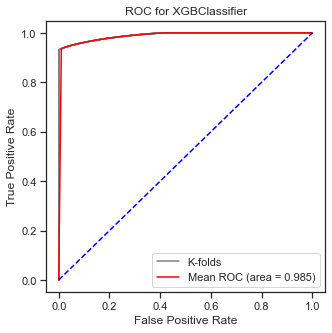

Model Accuracy 0.8148724023806858


,AUC train,AUC Validation,The diff,Over Fitting
0,0.985632,0.98527,0.000362,False


In [53]:
# apply the K-fold for the XGBoost
k_fold_GNB= KfoldPlot(final_train_data1.copy().values,train_labels1.copy().values,xgb_clf, 5) 
k_fold_GNB[3]

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


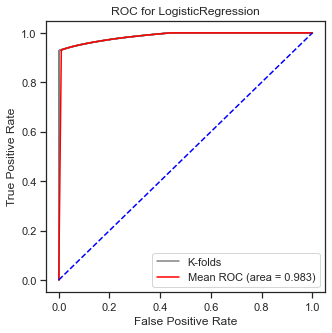

Model Accuracy 0.9632399563976801


,AUC train,AUC Validation,The diff,Over Fitting
0,0.983028,0.983021,0.000007,False


In [54]:
# apply the K-fold for the Logistic regression
k_fold_GNB= KfoldPlot(final_train_data1.copy().values,train_labels1.copy().values,LR_clf, 5) 
k_fold_GNB[3]

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


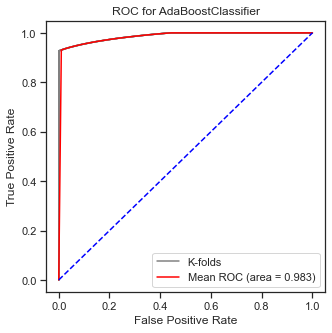

Model Accuracy 0.9629505549270159


,AUC train,AUC Validation,The diff,Over Fitting
0,0.983137,0.983125,0.000012,False


In [55]:
# apply the K-fold for the AdaBoost
k_fold_GNB= KfoldPlot(final_train_data1.copy().values,train_labels1.copy().values,AB_clf, 5) 
k_fold_GNB[3]

<b> The best clasiifier is XGBoost according the measures and we will use in in the following parts.

--------------------------------------------------------
## 7.Explainable_AI-_SHAP

In this part, we will use the SHAP model to get an explanation of the features and their contribution to learning. We will first explain the concept SHAP and then perform an interpretation globally and locally.

-----------------------------------------

### A- SHAP value (explanation)
SHAP is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.
SHAP Values break down a prediction to show the impact of each feature.
A prediction can be explained by assuming that each feature value of the instance is a "player" in a game where the prediction is the payout.

### B-  Global interpretability
In this part, we presented a global interpretation for the data.

[07:13:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


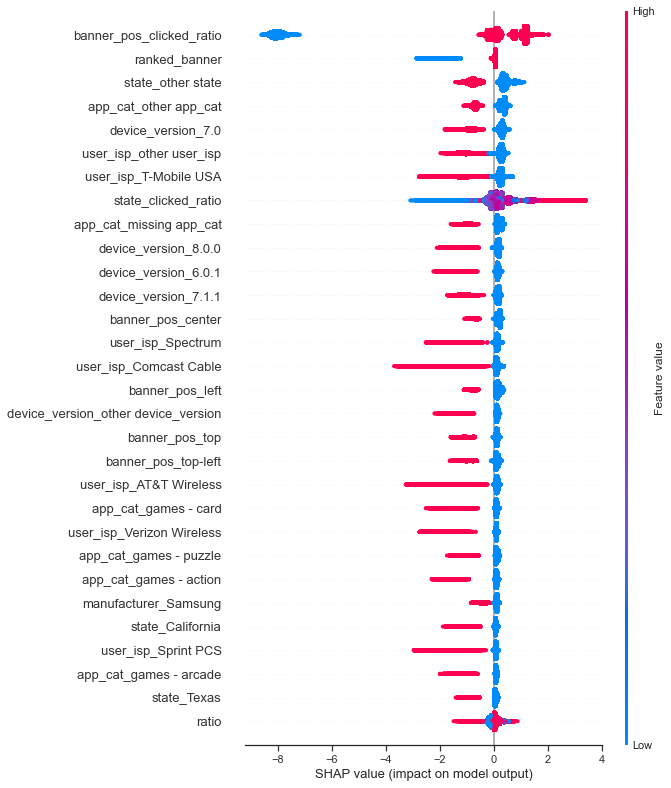

In [56]:
xgb=xgb_clf                                   # Choose XGBoost model
xgb.fit(final_train_data1,train_labels1)      # fit the model with the train data
explainer = shap.TreeExplainer(xgb)           # Create object that can calculate shap values

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(final_train_data1)
# create the summary plot on the data
shap.summary_plot(shap_values, final_train_data1 ,max_display=30)

<b> Explanation: </b> <br>In the summary plot of SHAP, each point is a Shapley value for a feature and an instance. The y-axis is the features that ranked in descending order according to their importance and x-axis is the shapley value- shows whether the effect of that value is associated with a higher or lower prediction. We can see different colors that represents whether that variable is high (in red) or low (in blue) for that record.
<br> The summary plot of SHAP shows the positive and negative relationships of the predictors with the target variable. It created simple numeric measures to see which features mattered to a model and this helped us make comparisons between features easily. 
<br> <b> In our plot: </b> <br>
First, it can be noticed that the new columns created from the banner_pos column are the 2 most important according to SHAP. In these 2 columns the higer their value the higher impact on clicked. It is also happend to state_clicked ratio column that we are created in the feature engeneering. In contrast almost all the rest have negative impact on the clicked. <br>
In the banner_posed_clicked_ratio column, distinct groups are clearly distinguished. We think this makes sense since we noticed that there are 4 groups that greatly affect the clicks and in contrast 4 groups that have no clicks at all.

### C-  Local interpretability
In this part, we choose 3 random rows and presented a local interpretation for them.

In [57]:
# choose randomlly 3 rows for the local interpretation
first_sample = final_train_data1.sample(1,axis=0).index
second_sample = final_train_data1.sample(1,axis=0).index
third_sample = final_train_data1.sample(1,axis=0).index

In [58]:
# apply the local interpretation for the first random row
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[first_sample,:], final_train_data1.iloc[first_sample,:])

<b> Explanation: </b> <br> we can see that all the blue features pull the prediction to be lower (not clicked). The most important features for this observation according to this plot are: banner_pos_clicked_ratio, device_version_7.0 and state_other state in descending order.

In [59]:
# apply the local interpretation for the second random row
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[second_sample,:], final_train_data1.iloc[second_sample,:])

<b> Explanation: </b> <br> we can see that we have not blue features that pull the prediction to be lower (not clicked). The most important features for this observation according to this plot are:  state_clicked_ratio, banner_pos_clicked_ratio and state_other state in descending order. <br> We think that for this sample we would get a positive label (1) since all the features affect in the positive direction.

In [60]:
# apply the local interpretation for the third random row
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[third_sample,:], final_train_data1.iloc[third_sample,:])

<b> Explanation: </b> <br> we can see that all the blue features pull the prediction to be lower (not clicked). The most important features for this observation according to this plot are: banner_pos_clicked_ratio, device_version_8.0.0 and app_cat_other app_cat in descending order.

--------------------------------------------------------
## 8.Inference

In this part we will perform the pre-processing we did on the training set in the same way on the test set with the outputs we received from the pre-processing of the training. We will then make a prediction on the test set and write these results to a text file. <br> we didn't apply here adasyn because it's the test set.

-----------------------------------------

### A- pre-processing on the test set

In [61]:
# this function get data, dict tresholf for the features engeneering and objects that we ger from the train set so 
# it will be the same on the test. it return the final test data.
def main_test(df,dict_treshold,scaler,pca_unit8,pca_numeric,columns_from_train,dict_values,hashed_list,pca=False):
    data=df.copy()                    # make a copy to the data
    # convert in train set
    data = data.replace(True,1)
    data = data.replace(False,0)
    data = data.replace('unknown',np.nan)
    
    # show nulls in the data
    show_nulls(data)
    
    # Show some plots
    showheatmap(data)                      # show heat map only for the numeric columns
    get_histogram(data)                    # show histogram for the numeric columns
    
    Types=Divide_data_by_type(data)        # Print the type of the columns
    
    data=data.drop('resolution', axis=1)   # delete the resolution column   
    data=data.drop('app_id', axis=1)       # delete the app column
    data=data.drop('device_model', axis=1) # delete the device_model column
    
    data['ranked_banner']=data['banner_pos'].apply(create_ranked_col_for_banner)   # Create a new column for the banner
    
    list_for_keys=['banner_pos','state']     # The categorial columns that we will calculate their clicked ratio
    for i in range(len(list_for_keys)):      # Applying the results for the feature engineering of the train set 
        hash_df=hashed_list[i]
        data[list_for_keys[i]+'_clicked_ratio']=data.apply(lambda row:calc_clicked_ratio(row[list_for_keys[i]],hash_df),axis=1)
    
    # another feature engeneering for the cateogiral columns to reduce the dimension that will be after the dummies
    new_data = transformdata_test(data, ['manufacturer', 'device_version', 'app_cat','user_isp','state'], dict_values)

    new_data=new_data.drop('op_id',axis=1)    # delete the op_id column
    
    # apply the dummies for the categorial columns
    print('new data columns before dummies')
    print(new_data.columns)
    new_data_after_dummies=dummies(new_data,['state','user_isp','app_cat','banner_pos','manufacturer','device_version'])
    
    # apply another feature engeneering on the test
    new_data_after_dummies['area']=new_data_after_dummies['device_height']*new_data_after_dummies['device_width']
    new_data_after_dummies['ratio']=new_data_after_dummies['device_height']/new_data_after_dummies['device_width']
    
    # Normlize the data with log and standart scaler for test
    new_data_after_dummies=make_log_for_height_and_width(new_data_after_dummies)
    print('new data columns before normalized:')
    print(new_data_after_dummies.columns)
    new_data_after_Normalize=Normalize(new_data_after_dummies,scaler)
    # contact the numerical and cateogiral columns into 1 data
    new_data_after_Normalize=concat_numerical_object(new_data_after_dummies,new_data_after_Normalize)
    
    if pca:          # if we want to use PCA
        # save lists for the categorial columns (after dummies) and numerical columns
        unit8_cols= list(new_data_after_Normalize.select_dtypes(include=['uint8']).columns)
        numeric_cols=list(new_data_after_Normalize.select_dtypes(exclude=['uint8']).columns)
        print (new_data_after_Normalize.shape)
        # apply the PCA seperatly for the numerical and dummies and contact them after
        unit8_df_afret_pca=pca_cols(new_data_after_Normalize,unit8_cols,0.95,pca_unit8)
        numeric_df_afret_pca,PCA_numeric=pca_cols(new_data_after_Normalize,numeric_cols,0.95)
        final_data=pd.concat([numeric_df_afret_pca,unit8_df_afret_pca] , axis=1)
        
    else:         # if we don't want to use PCA
        # save the final data
        final_data = new_data_after_Normalize
    
    # if we have a column in the train but not in the test (missing this specific category)
    for col in columns_from_train:
        if col not in list(final_data.columns):
            final_data[col]=0        # add with 0 value for each row
        
        
    return final_data

Here we can see the number of null for each column:
                 Total          %
manufacturer    193061  30.656087
device_model    193011  30.648148
app_cat         149640  23.761282
user_isp             7   0.001112
resolution           0   0.000000
device_width         0   0.000000
device_height        0   0.000000
device_version       0   0.000000
banner_pos           0   0.000000
app_id               0   0.000000
state                0   0.000000
timestamp            0   0.000000
op_id                0   0.000000
Here we can see the corralation heatmap of the columns:


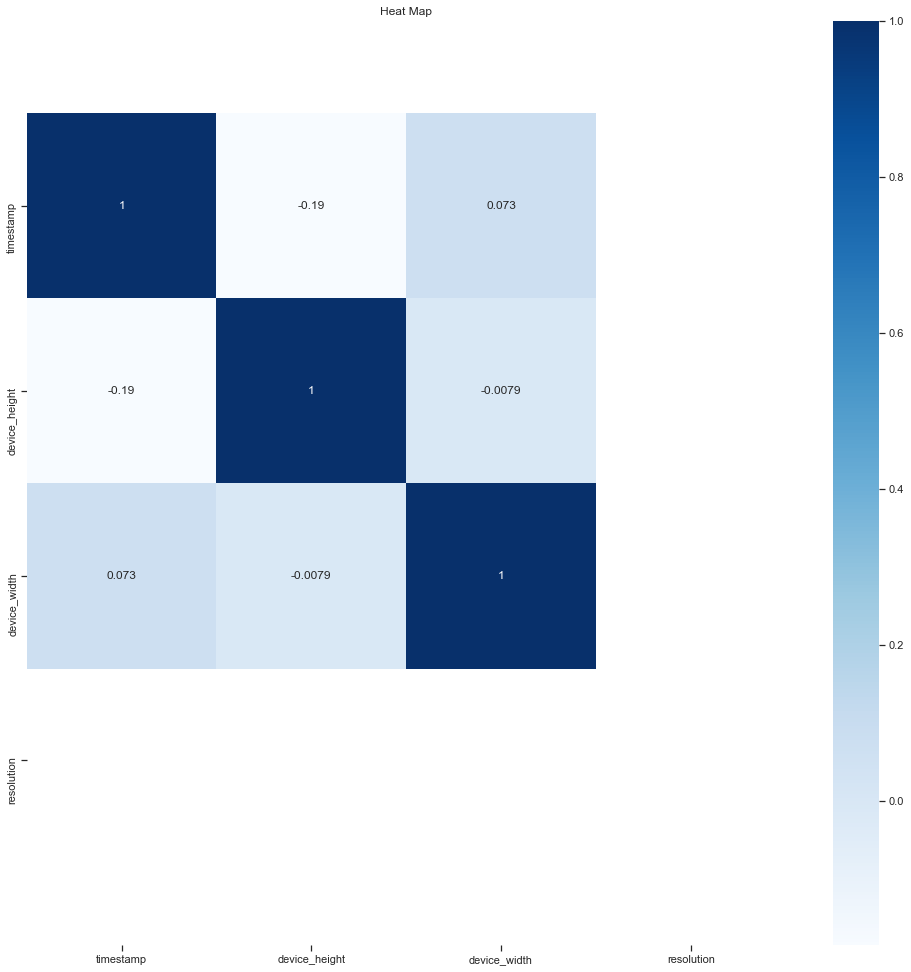

Histogram for feature: timestamp


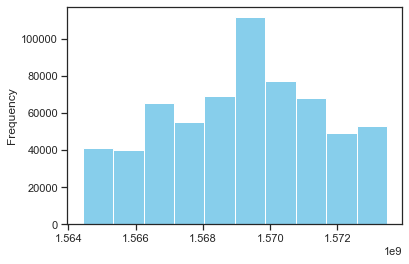

Histogram for feature: device_height


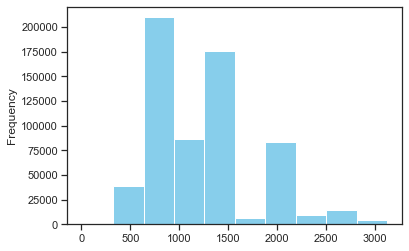

Histogram for feature: device_width


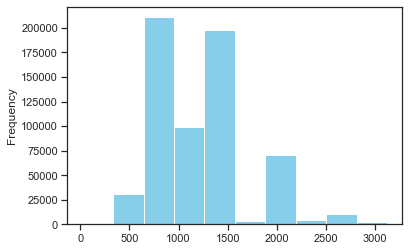

The categorial columns are: ['op_id', 'state', 'user_isp', 'app_id', 'app_cat', 'banner_pos', 'manufacturer', 'device_model', 'device_version']
The numerical columns are:  ['timestamp', 'device_height', 'device_width', 'resolution']
new data columns before dummies
Index(['timestamp', 'state', 'user_isp', 'app_cat', 'banner_pos',
       'manufacturer', 'device_version', 'device_height', 'device_width',
       'ranked_banner', 'banner_pos_clicked_ratio', 'state_clicked_ratio'],
      dtype='object')
new data columns before normalized:
Index(['timestamp', 'log_device_height', 'log_device_width', 'ranked_banner',
       'banner_pos_clicked_ratio', 'state_clicked_ratio', 'state_California',
       'state_Florida', 'state_Georgia', 'state_Illinois', 'state_New York',
       'state_Texas', 'state_other state', 'user_isp_AT&T Wireless',
       'user_isp_Comcast Cable', 'user_isp_Spectrum', 'user_isp_Sprint PCS',
       'user_isp_T-Mobile USA', 'user_isp_Verizon Wireless',
       'user_isp_othe

In [62]:
# call the main function for the test
final_test=main_test(temp_test,dict_treshold,scaler,pca_unit8,pca_numeric,columns_from_train,dict_values,hashed_list,pca=False)

In [63]:
# reset index for the columns to be in the same order as the train and validation
final_test=final_test.reindex(sorted(final_test.columns), axis=1)

### B- Predict on the test set and write into text file

In [64]:
xgb=xgb_clf                                                 # Choose linear regression model
xgb.fit(final_train_data1,train_labels1)                    # Fit our model on the train data
y_predict_test=list(xgb.predict(final_test))                # Predict the test data

with open('output_18.txt', 'w') as f:                       # open new text file
    for item in y_predict_test:                             # write into it
        item=int(item)
        f.write("%s\n" % item)

[07:38:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


---------------------------
# 9.Bonus
The problem is that as long as the time has passed, the characteristic is changing and the behaviour for one period is not the same as today's behaviour. There is often a delay between the time that an ad is served and the time a user engages with the ad, making it difficult to build a representative data set of ad engagements in real time.
In addition, the features that were relevant for yesterday, can be irrelevant for today. 
Moreover, marketers need to be sure of the quality of the data that goes into the machine. Continuous models guided by bad data may end up in a completely different end-point than a marketer intended. Just as machine learning can drive incredibly positive results in campaign accuracy and effectiveness, it can have an equal and opposite effect if the wrong data is used.

Therefore, in order to keep a high quality of the data, we need to be very sensative to the method we are choosing to fill the nulls of the data. There are a huge and growing number of forces exerting themselves on consumer behavior. Therefore, we must have a real time quality data. So the ETL proccess must be very supervized and in control.


Our solution to this problem is to make models that are updating every timestamp. In addition, we can use a weighted sampling method which gives higher weights to new samples. We suggest building a model that successfully learns from a continuous stream of data.
